In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#  plt.rc('font', family='AppleGothic') #한글 깨짐 방지 설정
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
train_df = pd.read_csv('./open/train.csv')
train_df.head()

ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0  TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1  TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2  TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3  TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4  TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   

   부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
0        18.90    15  부채 통합             0       0       0.0    0.0    0.0    C  
1        22.33    21  주택 개선             0  373572  234060.0    0.0    0.0    B  
2         8.60    14  부채 통합             0  928644  151944.0    0.0    0.0    A  
3        15.09    15  부채 통합             0  325824  153108.0    0.0    0.0    C  
4        25.39    19  주요 구매             0  228540  148956.0    0.0    0.0    B

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [4]:
train_df.describe(include='all')

ID          대출금액        대출기간       근로기간    주택소유상태  \
count         96294  9.629400e+04       96294      96294     96294   
unique        96294           NaN           2         16         4   
top     TRAIN_00000           NaN   36 months  10+ years  MORTGAGE   
freq              1           NaN       64479      31585     47934   
mean            NaN  1.830400e+07         NaN        NaN       NaN   
std             NaN  1.032908e+07         NaN        NaN       NaN   
min             NaN  1.200000e+06         NaN        NaN       NaN   
25%             NaN  1.020000e+07         NaN        NaN       NaN   
50%             NaN  1.680000e+07         NaN        NaN       NaN   
75%             NaN  2.400000e+07         NaN        NaN       NaN   
max             NaN  4.200000e+07         NaN        NaN       NaN   

                연간소득   부채_대비_소득_비율          총계좌수   대출목적  최근_2년간_연체_횟수  \
count   9.629400e+04  96294.000000  96294.000000  96294  96294.000000   
unique           NaN           NaN           NaN     12           NaN   
top              NaN           NaN           NaN  부채 통합           NaN   
freq             NaN           NaN           NaN  55150           NaN   
mean    9.392672e+07     19.379590     25.304827    NaN      0.345681   
std     9.956871e+07     33.569559     12.088566    NaN      0.919119   
min     0.000000e+00      0.000000      4.000000    NaN      0.000000   
25%     5.760000e+07     12.650000     17.000000    NaN      0.000000   
50%     7.800000e+07     18.740000     24.000000    NaN      0.000000   
75%     1.128000e+08     25.540000     32.000000    NaN      0.000000   
max     1.080000e+10   9999.000000    169.000000    NaN     30.000000   

               총상환원금         총상환이자         총연체금액         연체계좌수   대출등급  
count   9.629400e+04  9.629400e+04  96294.000000  96294.000000  96294  
unique           NaN           NaN           NaN           NaN      7  
top              NaN           NaN           NaN           NaN      B  
freq             NaN           NaN           NaN           NaN  28817  
mean    8.225035e+05  4.282282e+05     54.380584      0.005805    NaN  
std     1.027745e+06  4.402111e+05   1414.769218      0.079966    NaN  
min     0.000000e+00  0.000000e+00      0.000000      0.000000    NaN  
25%     3.075720e+05  1.346160e+05      0.000000      0.000000    NaN  
50%     5.976960e+05  2.870040e+05      0.000000      0.000000    NaN  
75%     1.055076e+06  5.702160e+05      0.000000      0.000000    NaN  
max     4.195594e+07  5.653416e+06  75768.000000      4.000000    NaN

In [5]:
# train set에 있는 주택소유상태 = 'ANY'인 것 삭제, test set에는 없는 항목이고 train set에도 1개 밖에 되지 않아 삭제하는 것이 좋다고 판단.

train_df = train_df[train_df['주택소유상태']!= 'ANY']

In [6]:
# 근로기간 컬럼 중복된 항목 합치기
# 함수 선언

def unit_standardization(x):
    if (x == '10+ years') or (x == '10+years'):
        return '10년이상'
    elif x == '9 years':
        return '9'
    elif x == '8 years':
        return '8'
    elif x == '7 years':
        return '7'
    elif x == '6 years':
        return '6'
    elif x == '5 years':
        return '5'
    elif x == '4 years':
        return '4'
    elif (x == '3 years') or (x == '3'):
        return '3'
    elif x == '2 years':
        return '2'
    elif (x == '1 year') or (x == '1 years'):
        return '1'
    elif (x == '< 1 year') or (x == '<1 year') :
        return '1년이하'
    else:
        return 'Unknown'

In [7]:
# train set에 적용

train_df['근로기간'] = train_df['근로기간'].apply(unit_standardization)

In [8]:
# 대출기간 범주형 --> 수치형으로 변경
# 함수 선언

def conv_loan_period(x):
    if x == ' 36 months':
        return 36
    else:
        return 60

In [9]:
# train set에 적용

train_df['대출기간'] = train_df['대출기간'].apply(conv_loan_period)

In [10]:
display(train_df.head(3))

ID      대출금액  대출기간   근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
0  TRAIN_00000  12480000    36      6      RENT   72000000        18.90    15   
1  TRAIN_00001  14400000    60  10년이상  MORTGAGE  130800000        22.33    21   
2  TRAIN_00002  12000000    36      5  MORTGAGE   96000000         8.60    14   

    대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
0  부채 통합             0       0       0.0    0.0    0.0    C  
1  주택 개선             0  373572  234060.0    0.0    0.0    B  
2  부채 통합             0  928644  151944.0    0.0    0.0    A

In [11]:
# 파생변수 생성하기

train_df['총상환액'] = train_df['총상환원금'] + train_df['총상환이자']

In [12]:
train_df['총상환대출비율'] = train_df['총상환액'] / train_df['대출금액']
train_df['월별대출금액'] = train_df['대출금액'] / train_df['대출기간']

In [13]:
#수치형 데이터 로그 스케일링 적용

numeric_columns = train_df.select_dtypes(include=[np.number]).columns

train_df[numeric_columns] = np.log1p(train_df[numeric_columns])

In [14]:
train_df.head(3)

ID       대출금액      대출기간   근로기간    주택소유상태       연간소득  부채_대비_소득_비율  \
0  TRAIN_00000  16.339638  3.610918      6      RENT  18.092177     2.990720   
1  TRAIN_00001  16.482739  4.110874  10년이상  MORTGAGE  18.689180     3.149740   
2  TRAIN_00002  16.300417  3.610918      5  MORTGAGE  18.379859     2.261763   

       총계좌수   대출목적  최근_2년간_연체_횟수      총상환원금      총상환이자  총연체금액  연체계좌수 대출등급  \
0  2.772589  부채 통합           0.0   0.000000   0.000000    0.0    0.0    C   
1  3.091042  주택 개선           0.0  12.830869  12.363337    0.0    0.0    B   
2  2.708050  부채 통합           0.0  13.741482  11.931274    0.0    0.0    A   

        총상환액   총상환대출비율     월별대출금액  
0   0.000000  0.000000  12.756122  
1  13.317326  0.041331  12.388398  
2  13.893017  0.086223  12.716901

In [15]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

In [16]:
# MinMaxScaler 객체 생성
mm_scaler = MinMaxScaler()

In [17]:
# 선택한 컬럼들에 대해 스케일링 적용
train_df[numeric_columns] = mm_scaler.fit_transform(train_df[numeric_columns])

In [18]:
# 범주형데이터 인코딩

from sklearn.preprocessing import LabelEncoder

In [19]:
# LabelEncoder 인스턴스 생성
label_encoder = LabelEncoder()

In [20]:
encoding_list = ['근로기간', '주택소유상태', '대출목적', '대출등급']

In [21]:
# 각 컬럼에 대해 라벨 인코딩 수행
for column in encoding_list:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [22]:
train_df.head()

ID      대출금액  대출기간  근로기간  주택소유상태      연간소득  부채_대비_소득_비율      총계좌수  \
0  TRAIN_00000  0.658671   0.0     7       2  0.783116     0.324713  0.329845   
1  TRAIN_00001  0.698921   1.0     1       0  0.808957     0.341979  0.420151   
2  TRAIN_00002  0.647640   0.0     6       0  0.795568     0.245568  0.311543   
3  TRAIN_00003  0.698921   0.0     9       0  0.809352     0.301639  0.329845   
4  TRAIN_00004  0.761684   1.0    11       2  0.782957     0.355360  0.393123   

   대출목적  최근_2년간_연체_횟수     총상환원금     총상환이자  총연체금액  연체계좌수  대출등급      총상환액  \
0     1           0.0  0.000000  0.000000    0.0    0.0     2  0.000000   
1    10           0.0  0.731015  0.795184    0.0    0.0     1  0.758338   
2     1           0.0  0.782895  0.767395    0.0    0.0     0  0.791120   
3     1           0.0  0.723224  0.767885    0.0    0.0     2  0.744785   
4     8           0.0  0.703018  0.766117    0.0    0.0     1  0.731233   

    총상환대출비율    월별대출금액  
0  0.000000  0.658669  
1  0.057717  0.555240  
2  0.120407  0.647638  
3  0.045690  0.698919  
4  0.028984  0.618003

In [23]:
# shap import

import shap

In [24]:
# train set을 train과 test로 나누기

from sklearn.model_selection import train_test_split

In [25]:
x_list = ['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수',
       '총상환액', '총상환대출비율', '월별대출금액']

In [42]:
X = train_df[x_list] 
y = train_df['대출등급']

# Train set과 Test set으로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y, test_size=0.2)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(77034, 16)
(19259, 16)
(77034,)
(19259,)


In [44]:
X_train.head(3)

대출금액  대출기간  근로기간  주택소유상태      연간소득  부채_대비_소득_비율      총계좌수  대출목적  \
54767  0.899392   1.0     1       0  0.789788     0.399342  0.535132     1   
19472  0.905362   1.0    10       0  0.800666     0.216276  0.378578     1   
38843  0.698921   1.0     7       2  0.799199     0.142636  0.393123     1   

       최근_2년간_연체_횟수     총상환원금     총상환이자  총연체금액  연체계좌수      총상환액   총상환대출비율  \
54767           0.0  0.721105  0.836299    0.0    0.0  0.770891  0.035560   
19472           0.0  0.815375  0.873233    0.0    0.0  0.837265  0.108762   
38843           0.0  0.742561  0.856544    0.0    0.0  0.790301  0.099652   

         월별대출금액  
54767  0.755712  
19472  0.761682  
38843  0.555240

In [29]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [30]:
# 머신러닝모델 라이브러리 

from sklearn.tree import DecisionTreeClassifier #할당받은거
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier #할당받은거
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier #할당받은거

# 평가 라이브러리

from sklearn.metrics import accuracy_score, f1_score

In [62]:
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [46]:
# selected feature로 모델링

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

xgb_model = XGBClassifier(n_estimators=600, max_depth=20, learning_rate=0.5, random_state = 42, n_jobs=-1)
xgb_model.fit(X_train[features], y_train)

y_pred_train = xgb_model.predict(X_train[features])
y_pred_test = xgb_model.predict(X_test[features])
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.972168  0.972217
test   0.920712  0.920525

In [32]:
from sklearn.metrics import plot_confusion_matrix

In [47]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

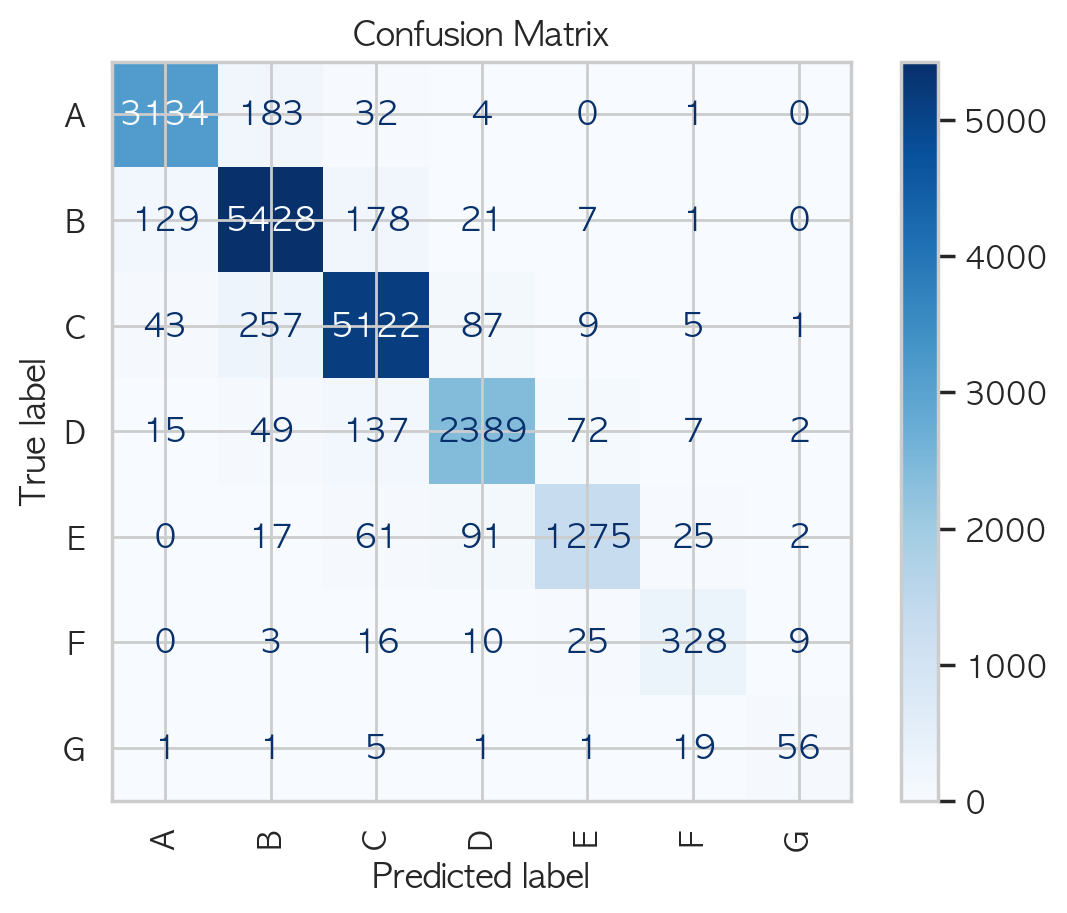

In [48]:
disp = plot_confusion_matrix(xgb_model, X_test[features], y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [49]:
train_df.tail()

ID      대출금액  대출기간  근로기간  주택소유상태      연간소득  부채_대비_소득_비율  \
96289  TRAIN_96289  0.698921   0.0     1       0  0.829450     0.253525   
96290  TRAIN_96290  0.893880   1.0     1       0  0.809352     0.197395   
96291  TRAIN_96291  0.698921   0.0     0       0  0.789788     0.271945   
96292  TRAIN_96292  0.721434   0.0     6       0  0.779565     0.315613   
96293  TRAIN_96293  0.555243   0.0     1       2  0.767677     0.276802   

           총계좌수  대출목적  최근_2년간_연체_횟수     총상환원금     총상환이자  총연체금액  연체계좌수  대출등급  \
96289  0.543598     3      0.000000  0.785646  0.842988    0.0    0.0     2   
96290  0.467524    10      0.000000  0.756443  0.878515    0.0    0.0     4   
96291  0.432757     3      0.000000  0.809799  0.797126    0.0    0.0     0   
96292  0.420151     1      0.319923  0.805396  0.875670    0.0    0.0     3   
96293  0.311543     3      0.000000  0.757643  0.805541    0.0    0.0     2   

           총상환액   총상환대출비율    월별대출금액  
96289  0.808519  0.135453  0.698919  
96290  0.807424  0.068079  0.750200  
96291  0.817931  0.158464  0.698919  
96292  0.831513  0.183953  0.721432  
96293  0.778849  0.134141  0.555240

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

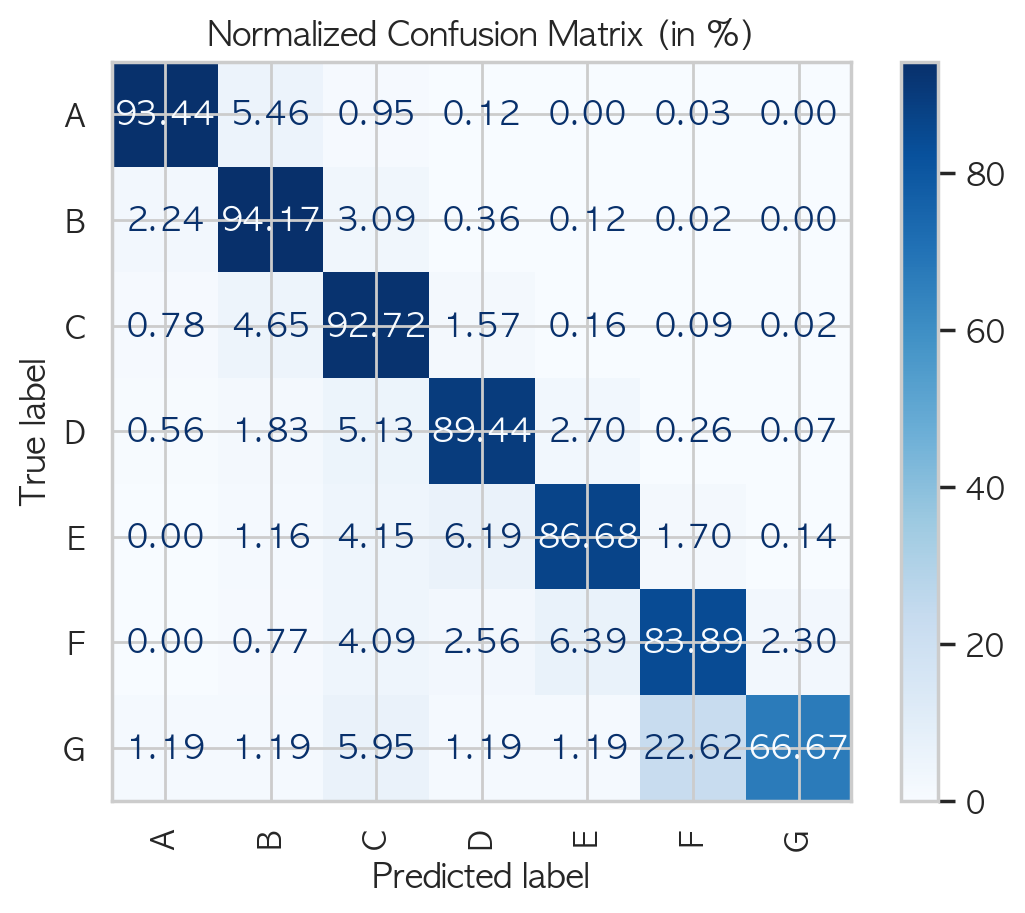

In [51]:
# Confusion Matrix 계산
cm = confusion_matrix(y_test, y_pred_test)

# 각 셀의 값을 전체 데이터 수로 나누어 백분율로 변환
cm_percent = cm / np.sum(cm, axis=1)[:, np.newaxis] * 100

# 클래스 이름 설정
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Confusion Matrix 그리기
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".2f", xticks_rotation='vertical')

plt.title('Normalized Confusion Matrix (in %)')
plt.show()

In [52]:
features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

In [55]:
# 예측 결과를 DataFrame에 추가
results_df = X_test[features].copy()
results_df['Actual_Class'] = y_test
results_df['Predicted_Class'] = y_pred_test.copy()

# Confusion Matrix 계산
# conf_mat = confusion_matrix(y_test, results_df['Predicted_Class'])

# class5으로 예측했지만 실제로는 class6인 행들을 DataFrame으로 추출
misclassified_df = results_df[(results_df['Predicted_Class'] == 5) & (results_df['Actual_Class'] == 6)]

# 결과 출력
display(misclassified_df)

대출기간     총상환원금     총상환이자   총상환대출비율    월별대출금액  Actual_Class  \
70026   1.0  0.730931  0.891492  0.084329  0.684492             6   
51462   0.0  0.705179  0.803404  0.208860  0.268750             6   
25655   1.0  0.674811  0.843484  0.048998  0.614702             6   
54820   1.0  0.753300  0.912238  0.119970  0.677750             6   
88975   0.0  0.652785  0.746760  0.054065  0.411887             6   
68245   0.0  0.697846  0.796702  0.107371  0.433774             6   
30113   1.0  0.781773  0.928943  0.161453  0.683379             6   
19514   1.0  0.713103  0.853527  0.032687  0.812963             6   
4322    1.0  0.787111  0.946512  0.232457  0.634834             6   
10633   1.0  0.697737  0.843503  0.037107  0.723158             6   
9651    1.0  0.736528  0.887808  0.154048  0.503959             6   
49870   1.0  0.727887  0.881301  0.117108  0.552295             6   
78463   1.0  0.700439  0.846775  0.037781  0.732047             6   
88470   1.0  0.000000  0.000000  0.000000  0.818992             6   
83105   1.0  0.752039  0.911605  0.119228  0.675848             6   
29570   1.0  0.744038  0.894327  0.107506  0.640949             6   
5158    1.0  0.719696  0.872287  0.078498  0.629035             6   
85615   1.0  0.713229  0.864981  0.078499  0.597087             6   
27943   1.0  0.758321  0.916165  0.156538  0.618471             6   

       Predicted_Class  
70026                5  
51462                5  
25655                5  
54820                5  
88975                5  
68245                5  
30113                5  
19514                5  
4322                 5  
10633                5  
9651                 5  
49870                5  
78463                5  
88470                5  
83105                5  
29570                5  
5158                 5  
85615                5  
27943                5

In [57]:
# class5으로 실제로도 class5으로 분류된 행들을 DataFrame으로 추출
good_cls_df = results_df[(results_df['Predicted_Class'] == 5) & (results_df['Actual_Class'] == 5)]

# 결과 출력
display(good_cls_df)

대출기간     총상환원금     총상환이자   총상환대출비율    월별대출금액  Actual_Class  \
30520   1.0  0.696901  0.839780  0.038506  0.699972             5   
57950   1.0  0.697084  0.826212  0.036377  0.676610             5   
58733   0.0  0.788869  0.879406  0.195538  0.662030             5   
89289   1.0  0.722380  0.867380  0.113367  0.510904             5   
49261   1.0  0.700514  0.836132  0.074891  0.503959             5   
...     ...       ...       ...       ...       ...           ...   
47421   1.0  0.814028  0.957783  0.143230  0.856321             5   
48955   1.0  0.768554  0.908097  0.109566  0.715308             5   
23714   1.0  0.735686  0.871156  0.073450  0.669675             5   
77830   1.0  0.759166  0.921767  0.089499  0.801481             5   
11528   1.0  0.769434  0.907438  0.143232  0.636156             5   

       Predicted_Class  
30520                5  
57950                5  
58733                5  
89289                5  
49261                5  
...                ...  
47421                5  
48955                5  
23714                5  
77830                5  
11528                5  

[328 rows x 7 columns]

In [58]:
# 그러면 G등급인데 F등급이라고 예측한 것들을 보자 :misclassified_df
# 그래서 F등급인데 F등급이라고 예측한 것들을 비교 :good_cls_df

In [173]:
# misclassified_df
# good_cls_df

<AxesSubplot:xlabel='대출기간', ylabel='Density'>

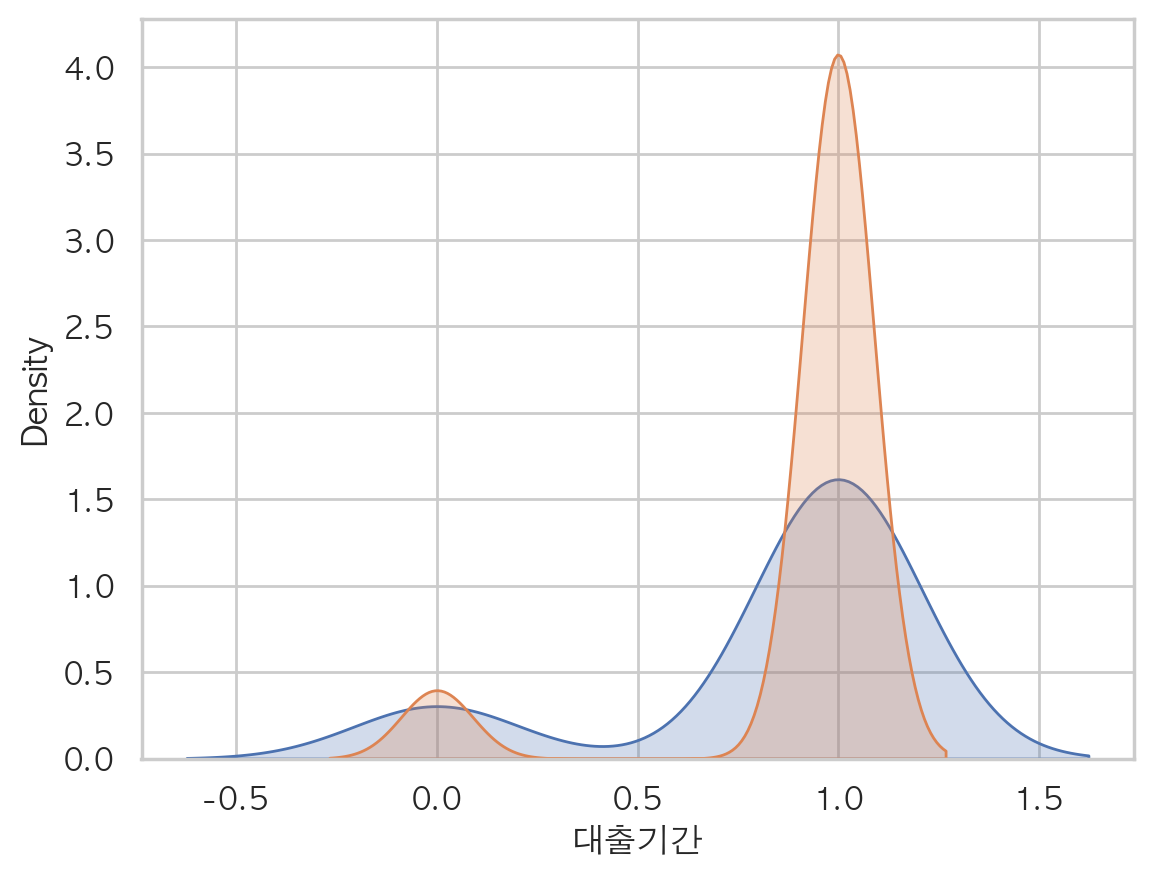

In [63]:
sns.kdeplot(misclassified_df['대출기간'], fill=True, label='Miss Fit Group')
sns.kdeplot(good_cls_df['대출기간'], fill=True, label='Good Fit Group')

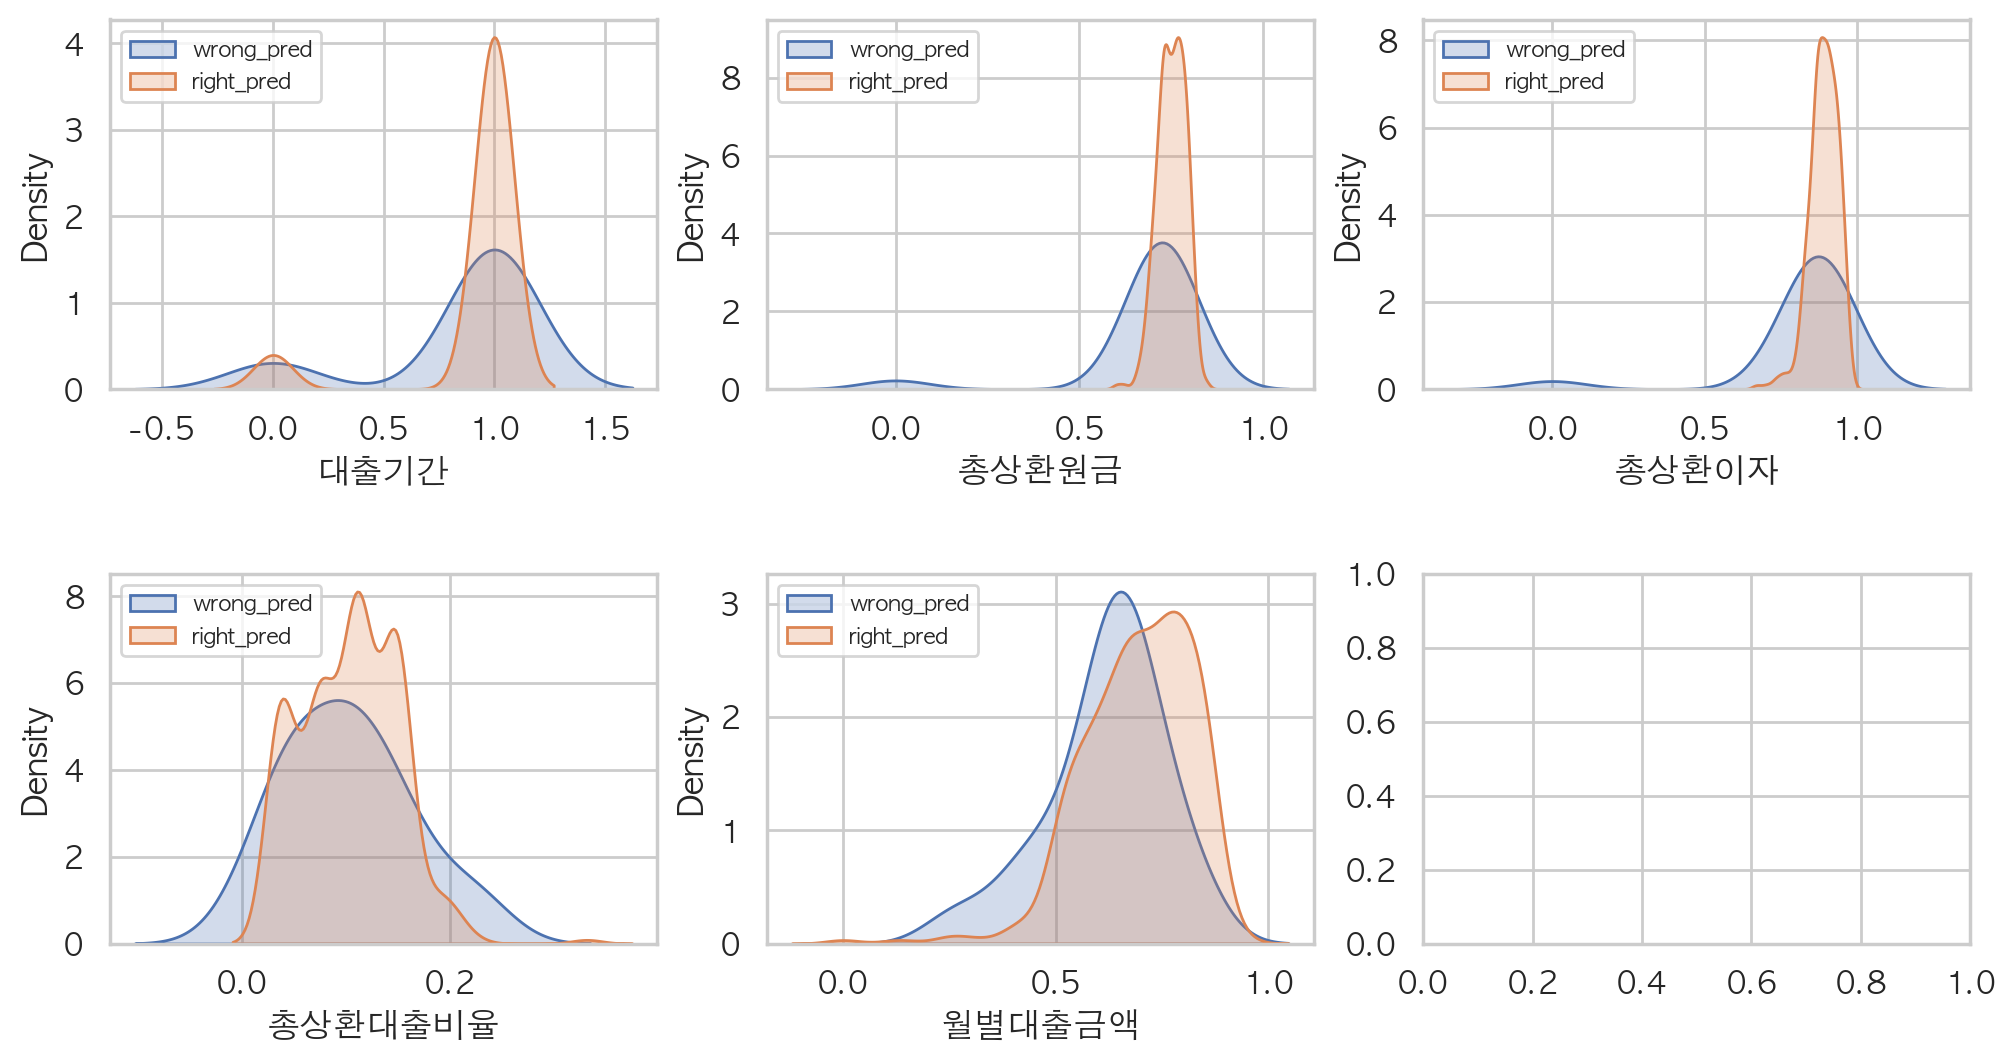

In [90]:
columns = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']  

# subplot 생성
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)  # subplot 간 간격 조정

# 컬럼별로 subplot에 그래프 그리기
for i in range(len(columns)):
    row = i // 3
    col = i % 3
    sns.kdeplot(misclassified_df[columns[i]], fill=True, label='wrong_pred', ax=axes[row, col]) 
    sns.kdeplot(good_cls_df[columns[i]], fill=True, label='right_pred', ax=axes[row, col])
    axes[row, col].set_xlabel(columns[i], fontsize=12)
    axes[row, col].set_ylabel('Density', fontsize=12)
    axes[row, col].legend(loc='upper left', fontsize=8)

# 그래프 표시
plt.show()

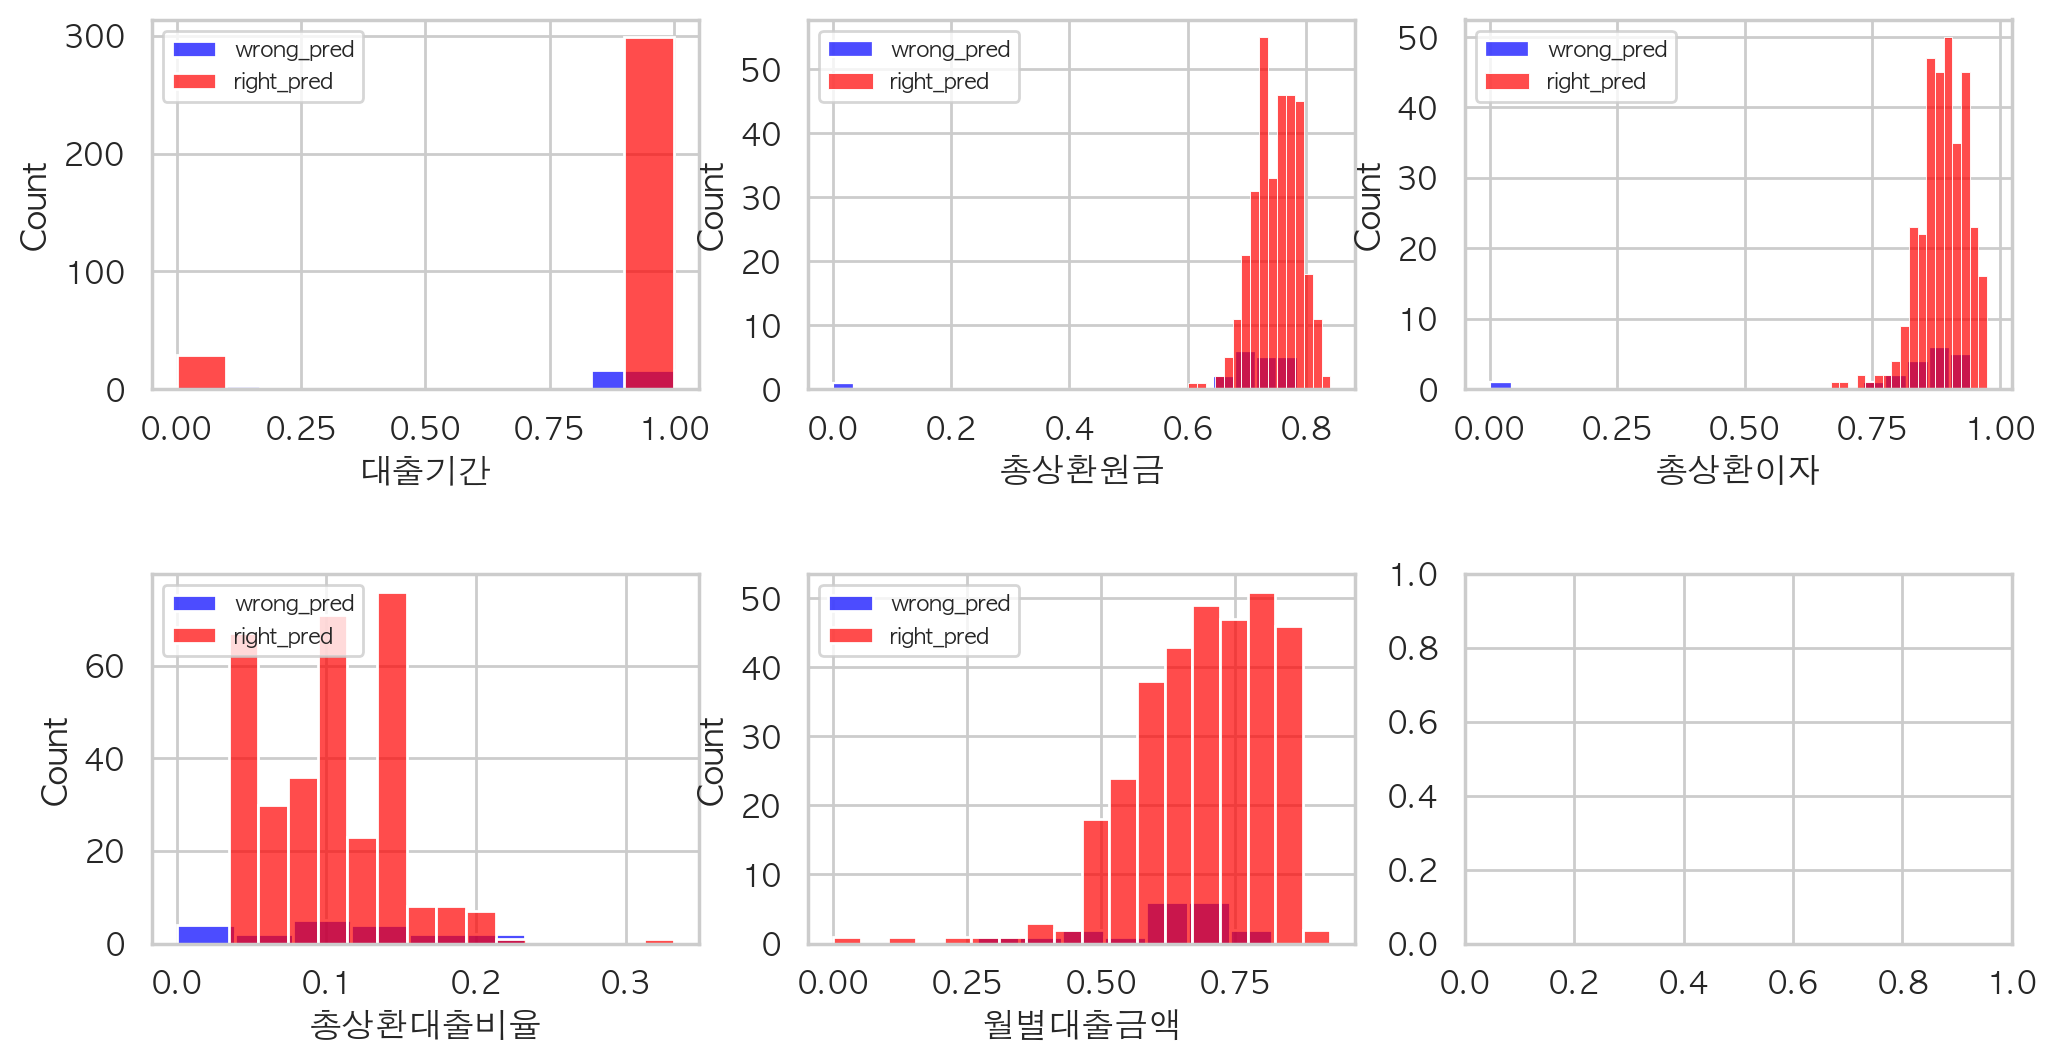

In [143]:
columns = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']  

# subplot 생성
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)  # subplot 간 간격 조정

# 컬럼별로 subplot에 그래프 그리기
for i in range(len(columns)):
    row = i // 3
    col = i % 3
    sns.histplot(misclassified_df[columns[i]], label='wrong_pred', ax=axes[row, col], color='blue', alpha=0.7) 
    sns.histplot(good_cls_df[columns[i]], label='right_pred', ax=axes[row, col], color='red', alpha=0.7)
    axes[row, col].set_xlabel(columns[i], fontsize=12)
    axes[row, col].set_ylabel('Count', fontsize=12)
    axes[row, col].legend(loc='upper left', fontsize=8)

# 그래프 표시
plt.show()


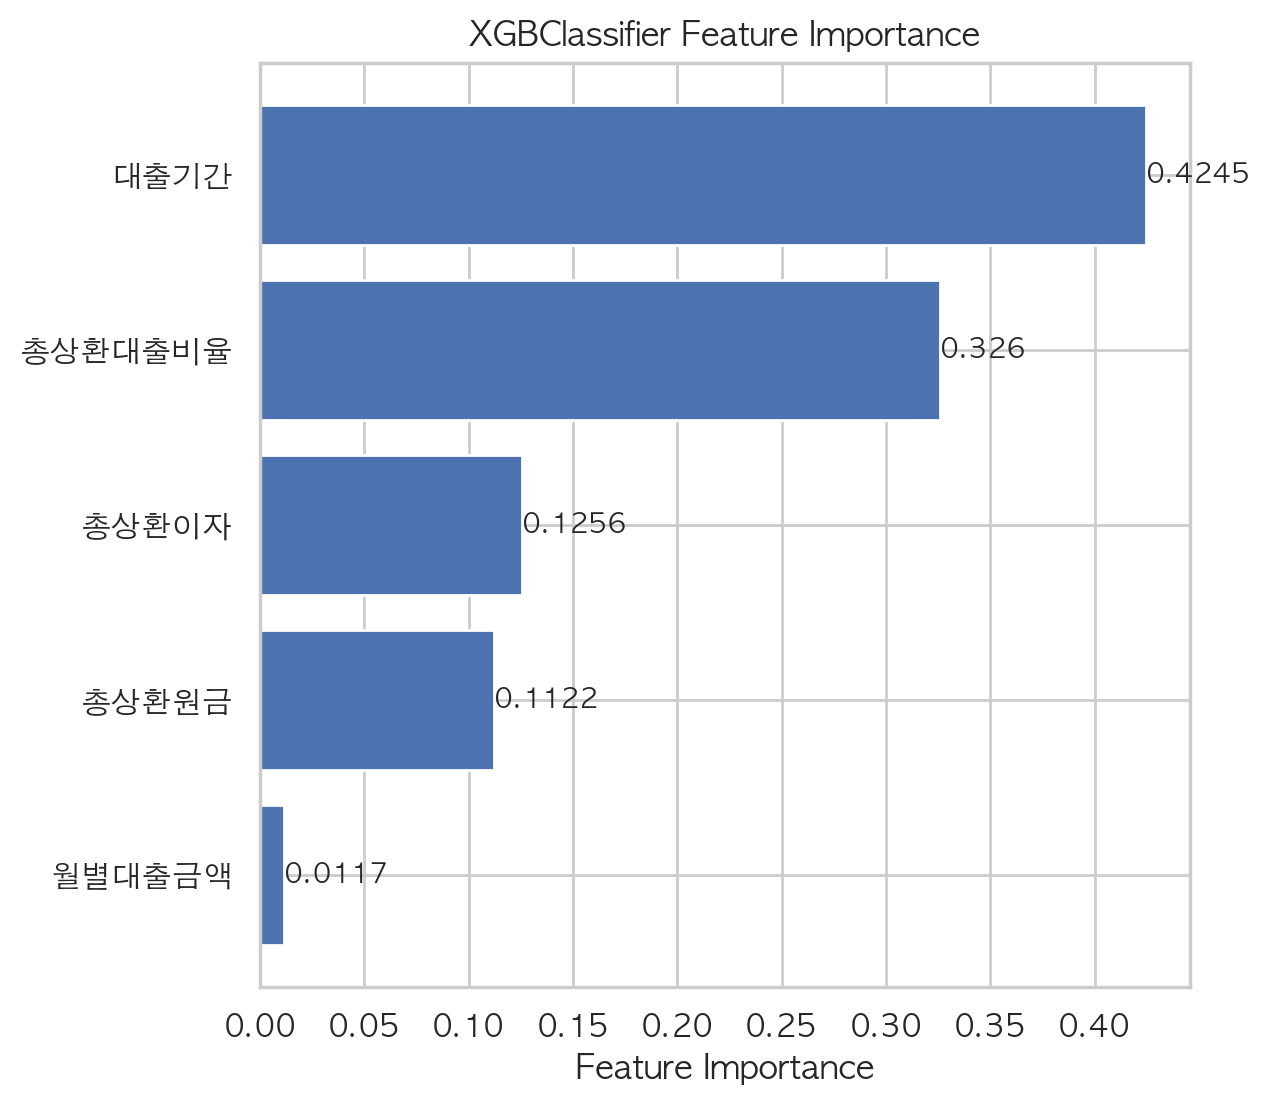

In [91]:
# feature importances 얻기
# 하지만 feature_importances_ 는 학습된 데이터를 기반으로 중요도를 알려주기 때문에 test set에 대해서는 알 수 없음, 즉, 4/5데이터에 대해서만 중요도를 알 수 있었음
feature_importances = xgb_model.feature_importances_

# feature importances를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_df = pd.DataFrame({'Feature': X_train[features].columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# feature importances 시각화
plt.figure(figsize=(6, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

# 수치 표시
for bar, val in zip(bars, feature_importance_df['Importance']):
    plt.text(val, bar.get_y() + bar.get_height()/2, round(val, 4), va='center', ha='left', fontsize=10)

plt.xlabel('Feature Importance')
plt.title('XGBClassifier Feature Importance')
plt.show()

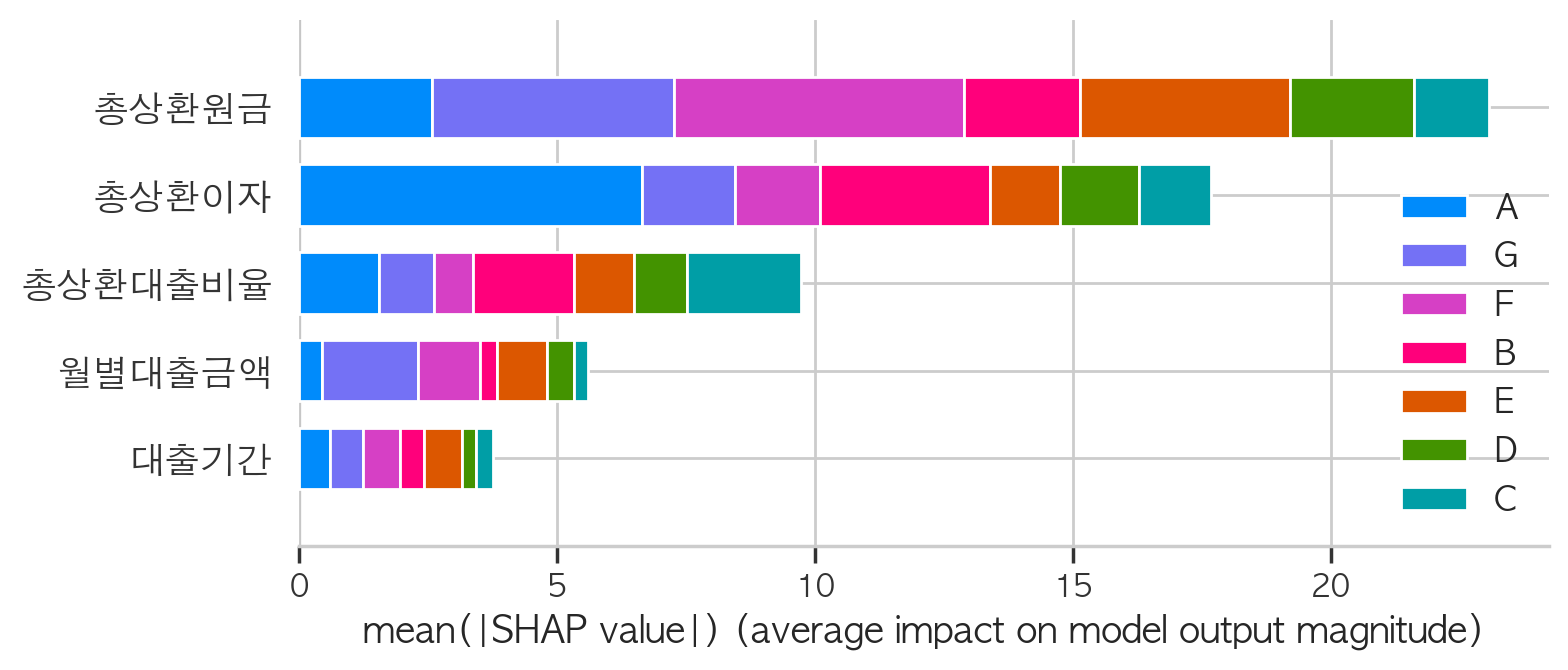

In [92]:
# SHAP Values
#생성된 explainer를 사용하여 테스트 데이터 (X_test)에 대한 SHAP 값들을 계산.

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test[features])
shap.summary_plot(shap_values, X_test[features], plot_type="bar", class_names=class_names)

In [ ]:
# SHAP (SHapley Additive exPlanations) 값은 특정 예측의 기여도를 나타내는 값
# SHAP 값이 양수인 경우는 예측값을 높이는 방향으로 기여하고, 음수인 경우는 예측값을 낮추는 방향으로 기여
# 특성의 값이 'high'인데 SHAP 값이 음수인 경우, 이 특성이 높은 값일수록 모델의 예측을 낮추는 방향으로 기여한다는 것을 나타냅니다. 
# 이는 해당 특성의 높은 값이 예측 변수와 부합하지 않거나, 다른 중요한 특성들과의 조합에 따라서는 예측을 줄이는 영향을 미친다는 것을 의미
# SHAP 값이 음수이고 해당 특성의 값이 높을 때, 이는 해당 특성이 모델 예측을 낮추는 방향으로 기여한다는 것을 의미

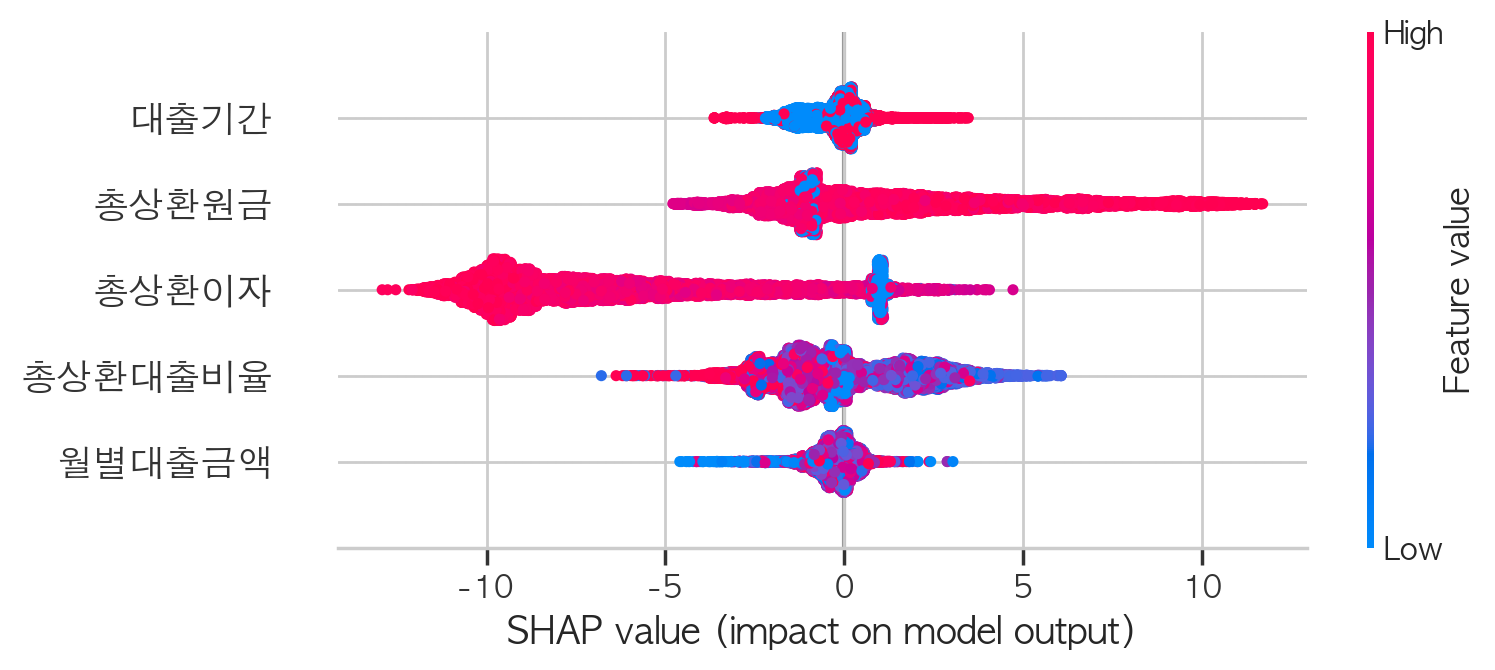

In [93]:
# shap.summary_plot 그리기
shap.summary_plot(shap_values[0], X_test[features], feature_names=X_test[features].columns, sort=False)
plt.show()

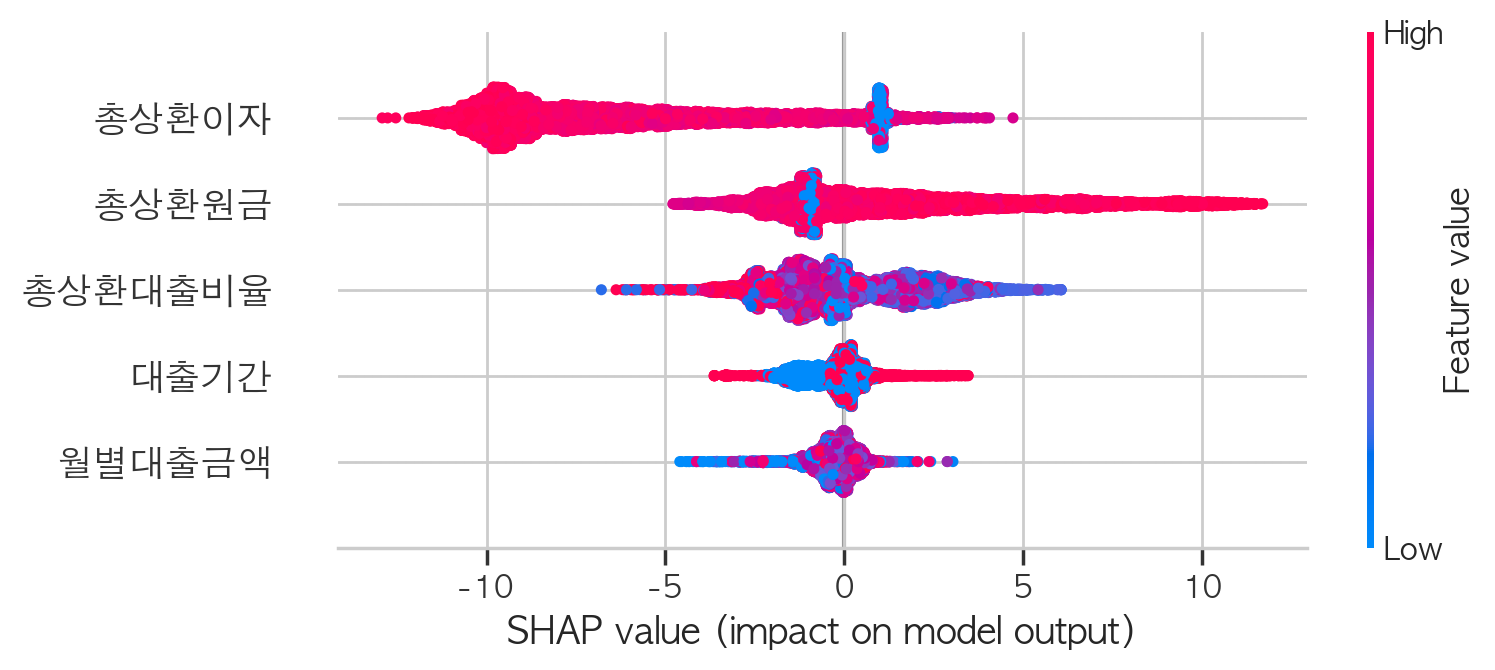

In [136]:
shap.summary_plot(shap_values[0], X_test[features], feature_names=X_test[features].columns)

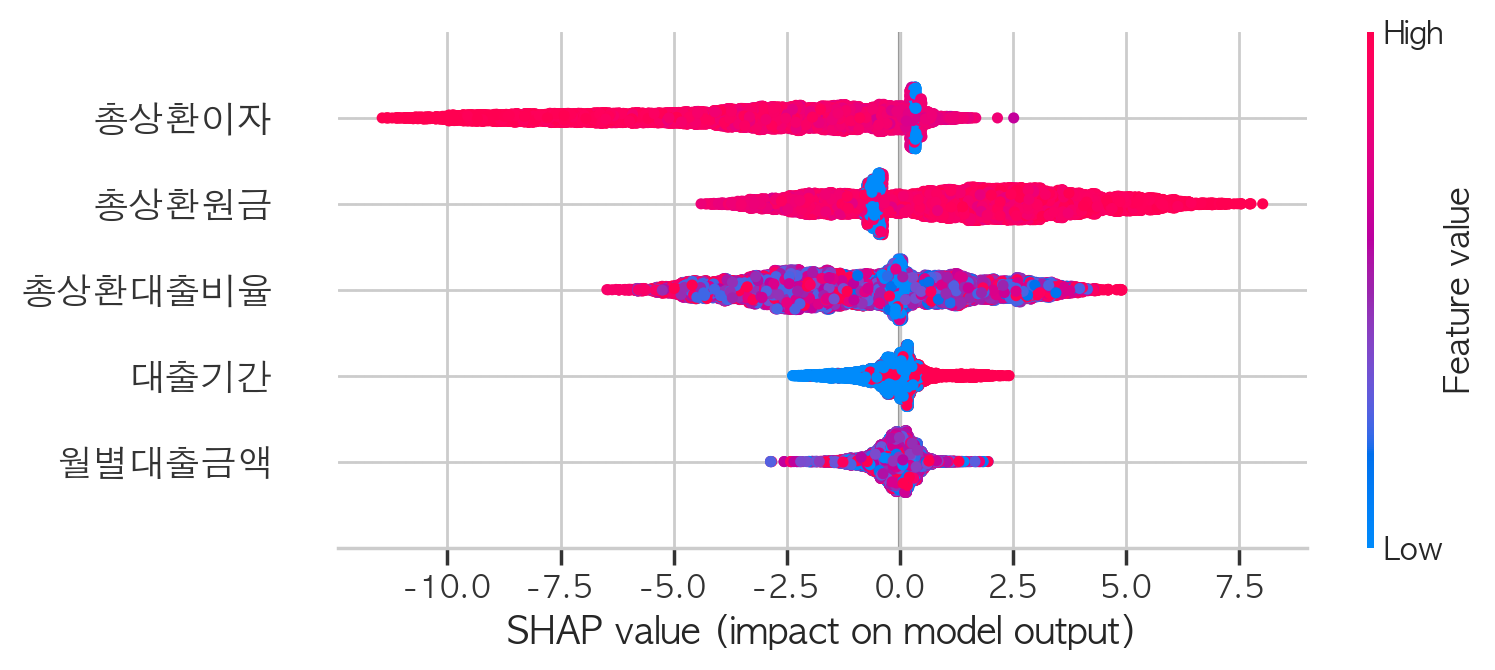

In [137]:
shap.summary_plot(shap_values[1], X_test[features], feature_names=X_test[features].columns)

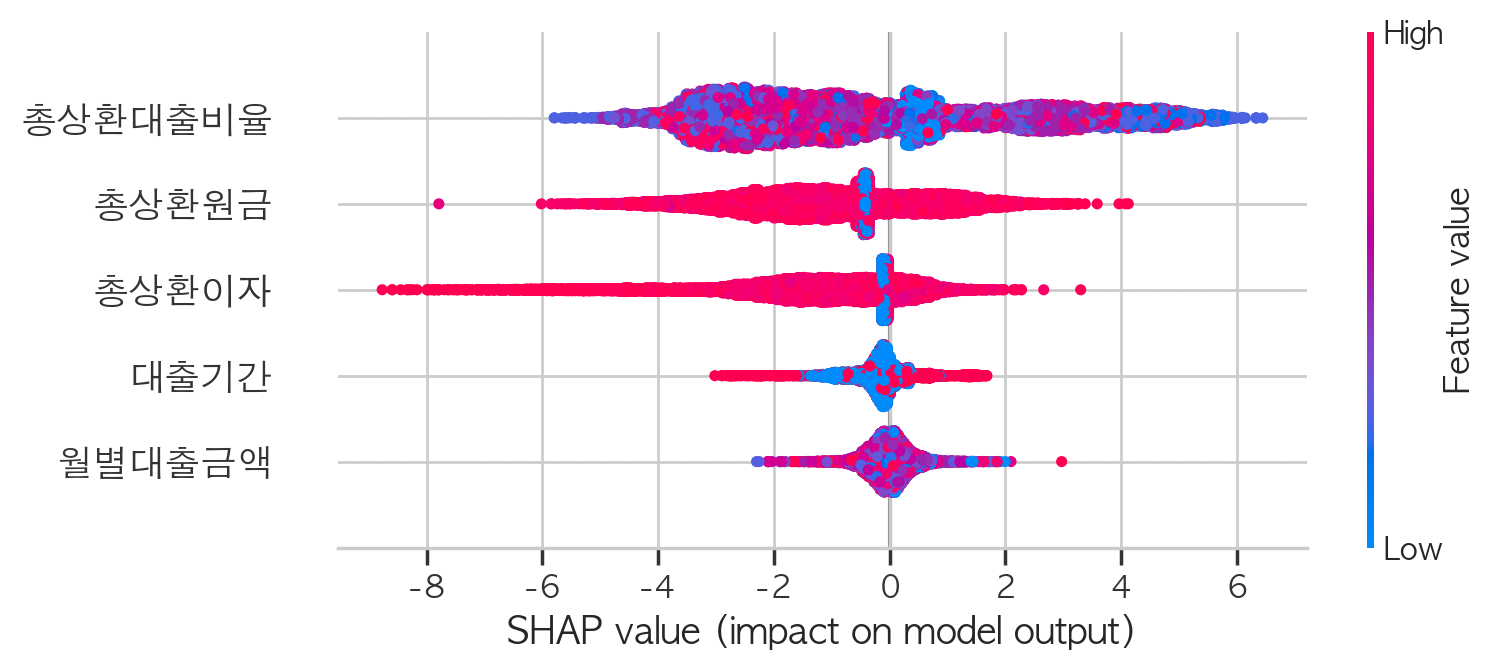

In [138]:
shap.summary_plot(shap_values[2], X_test[features], feature_names=X_test[features].columns)

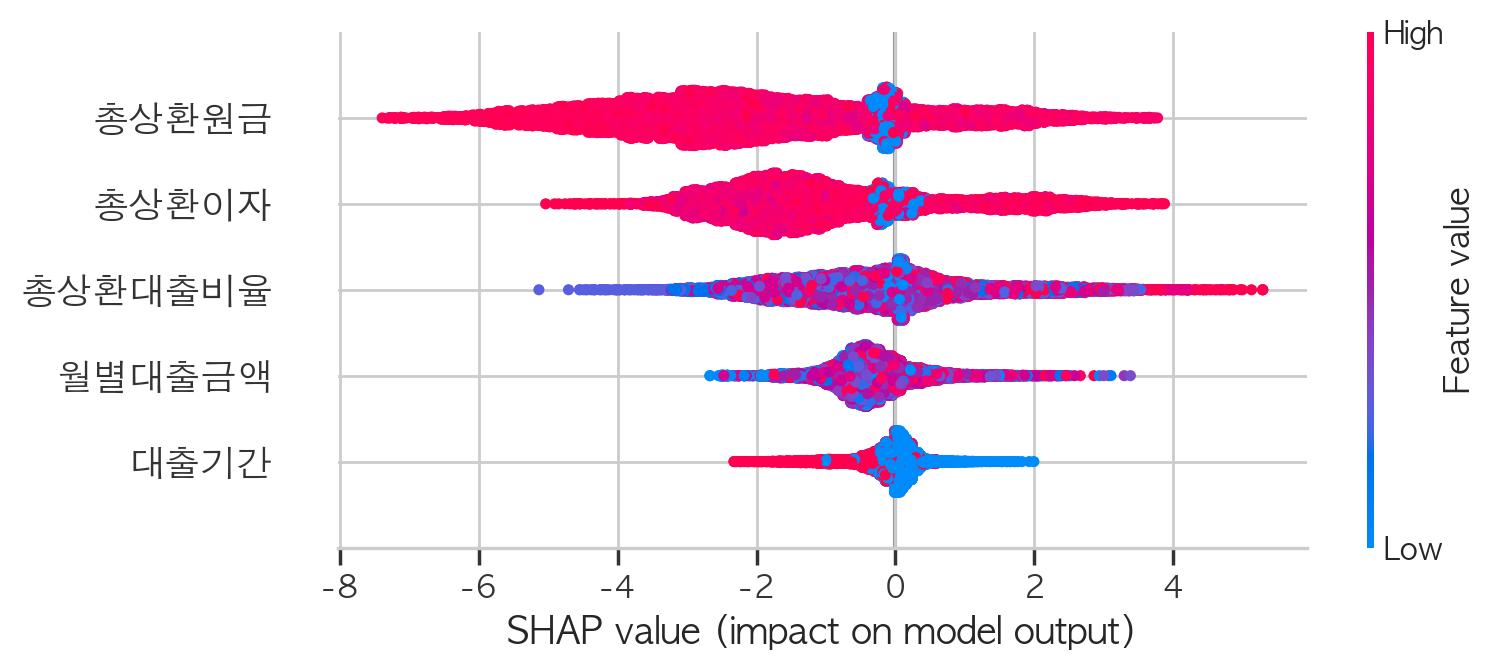

In [139]:
shap.summary_plot(shap_values[3], X_test[features], feature_names=X_test[features].columns)

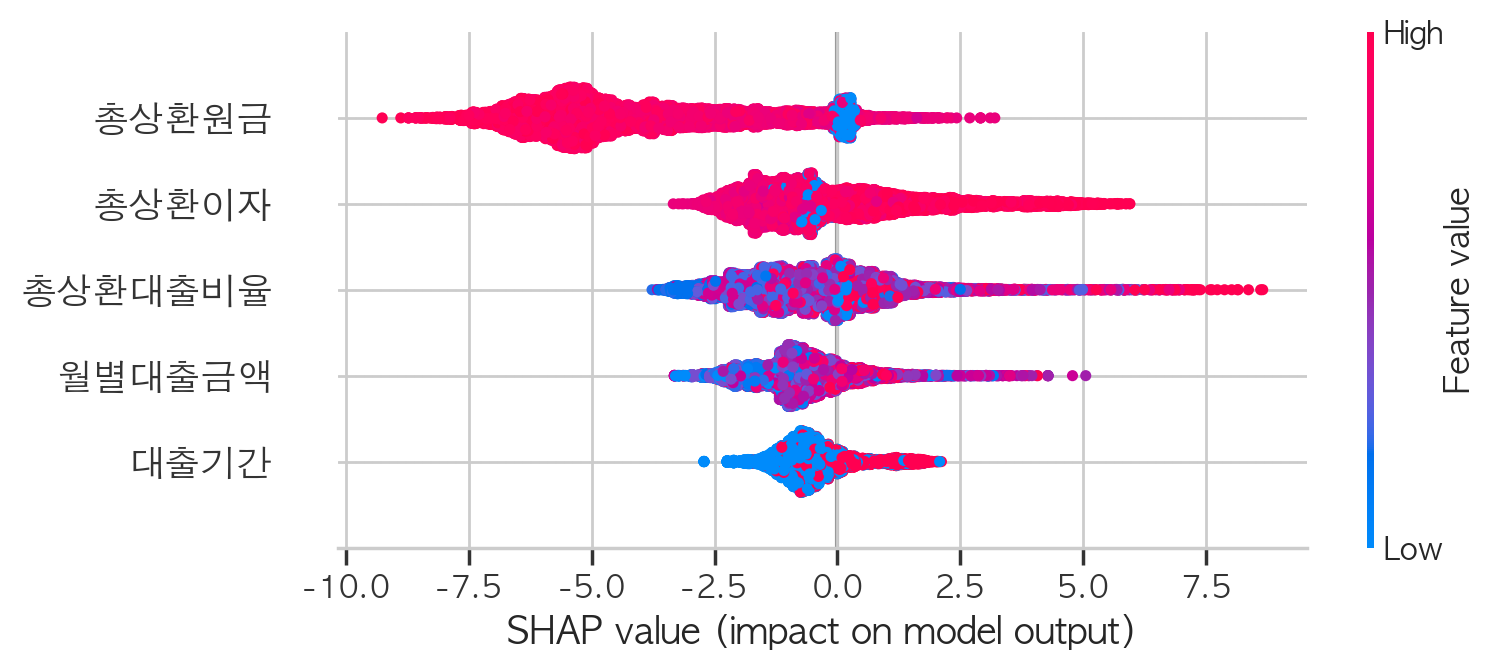

In [140]:
shap.summary_plot(shap_values[4], X_test[features], feature_names=X_test[features].columns)

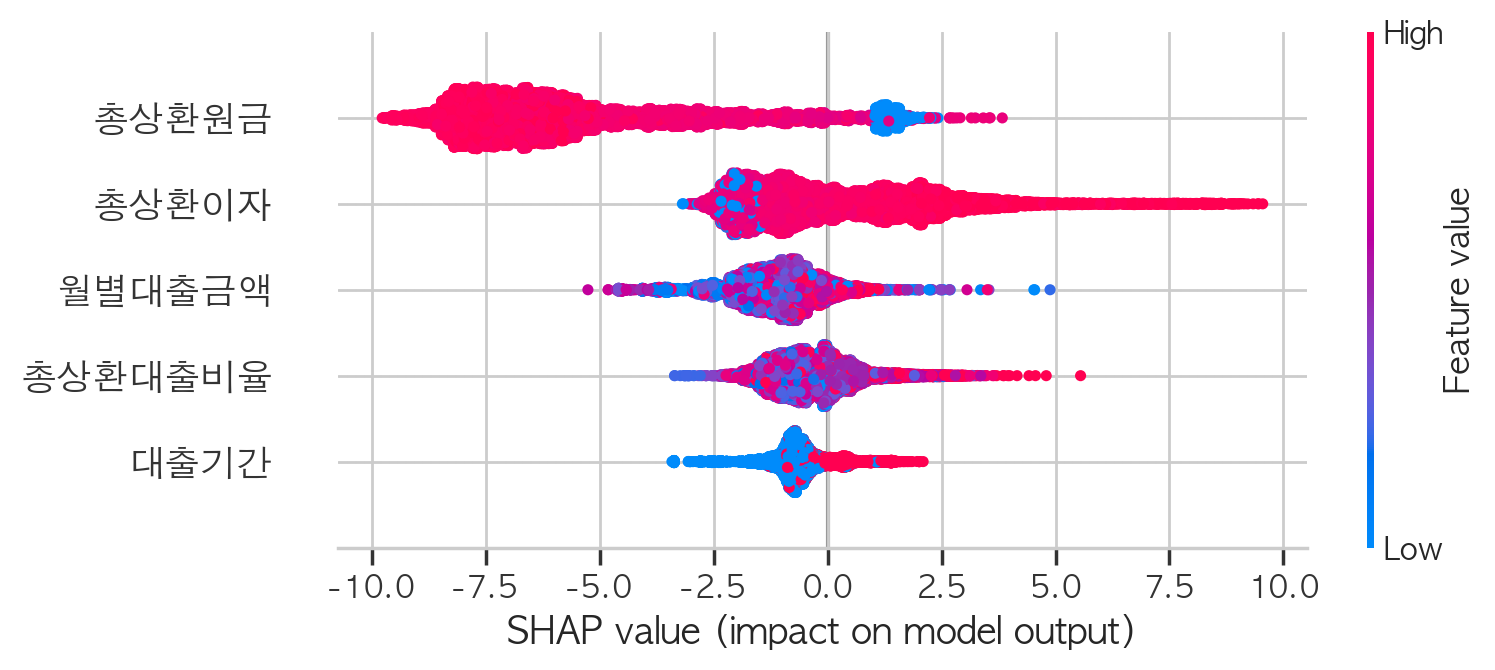

In [141]:
shap.summary_plot(shap_values[5], X_test[features], feature_names=X_test[features].columns)

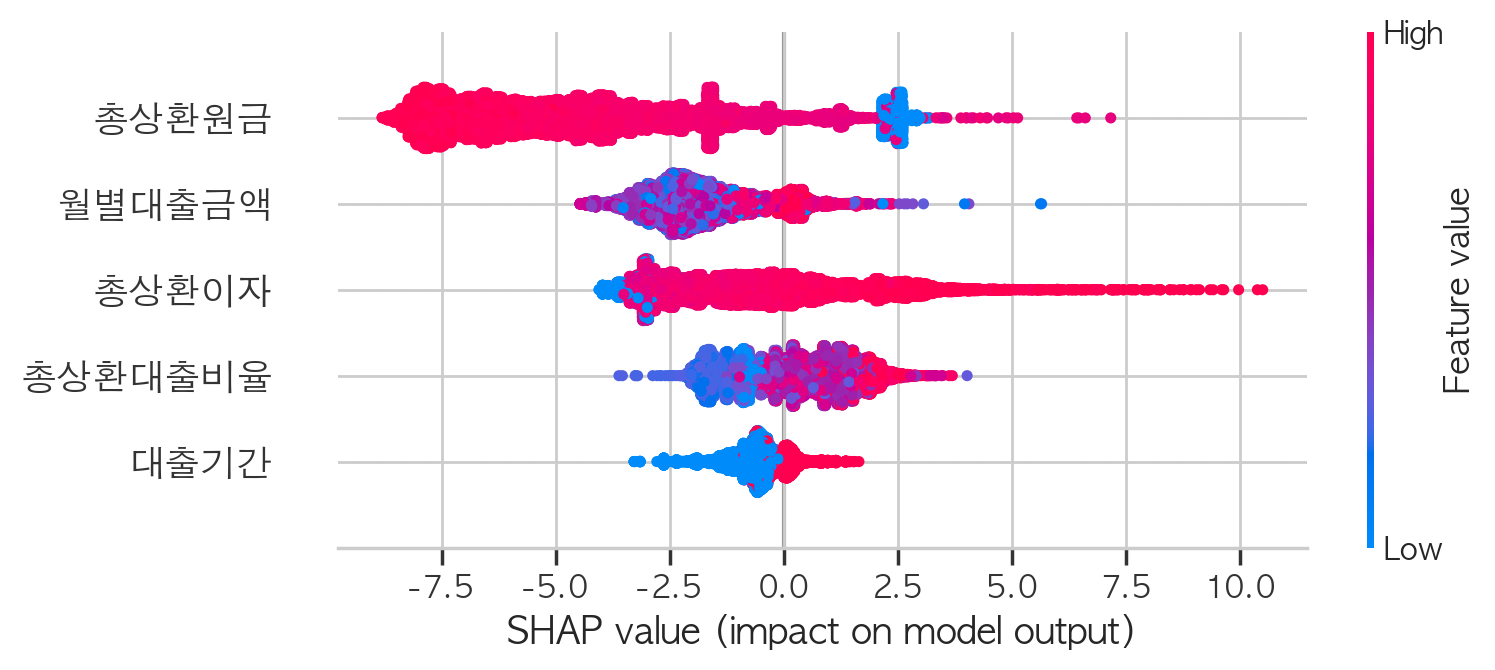

In [142]:
shap.summary_plot(shap_values[6], X_test[features], feature_names=X_test[features].columns)

In [113]:
# Shapley values 및 입력 데이터 가져오기
shap_values_class_6 = shap_values[6]
X_test_class_6 = X_test[features]

# 특정 컬럼에서 Shapley values가 음수인 instance 인덱스 추출
column_index = features.index("월별대출금액")  # "원하는컬럼이름"을 실제 컬럼의 이름으로 바꿔주세요
negative_shap_indices = np.where(shap_values_class_6[:, column_index] < 0)[0]

# Shapley values가 음수인 instance들 추출
instances_with_negative_shap = X_test_class_6.iloc[negative_shap_indices]

# 결과 확인
instances_with_negative_shap

대출기간     총상환원금     총상환이자   총상환대출비율    월별대출금액
33568   1.0  0.716461  0.828224  0.068983  0.535835
17667   0.0  0.741496  0.752105  0.043447  0.761682
71130   0.0  0.644569  0.680223  0.090929  0.114042
47841   0.0  0.758061  0.759169  0.082933  0.647638
64108   0.0  0.750009  0.773667  0.127602  0.503959
...     ...       ...       ...       ...       ...
14810   0.0  0.734652  0.756914  0.043156  0.742276
56750   0.0  0.760147  0.822872  0.182267  0.498037
30076   0.0  0.689294  0.682601  0.042082  0.503959
64963   0.0  0.856060  0.877068  0.164113  0.937237
30724   0.0  0.809040  0.874408  0.137104  0.818380

[16946 rows x 5 columns]

In [117]:
instances_with_negative_shap.index

Int64Index([33568, 17667, 71130, 47841, 64108, 69830, 56258, 18857, 21302,
            92691,
            ...
            27777, 66654, 34629, 12972, 14875, 14810, 56750, 30076, 64963,
            30724],
           dtype='int64', length=16946)

In [127]:
# Shapley values가 음수인 instance들의 인덱스 추출
negative_shap_indices = instances_with_negative_shap.index

# train_df에서 해당 인덱스의 행만 추출
selected_rows = train_df.loc[negative_shap_indices]

# 결과 확인
selected_rows

ID      대출금액  대출기간  근로기간  주택소유상태      연간소득  부채_대비_소득_비율  \
33568  TRAIN_33568  0.679515   1.0     1       2  0.791988     0.350178   
17667  TRAIN_17667  0.761684   0.0     1       0  0.800183     0.293805   
71130  TRAIN_71130  0.114044   0.0    10       0  0.746919     0.358362   
47841  TRAIN_47841  0.647640   0.0     1       2  0.819791     0.267971   
64108  TRAIN_64108  0.503962   0.0     7       0  0.795568     0.217308   
...            ...       ...   ...   ...     ...       ...          ...   
14810  TRAIN_14810  0.742278   0.0     1       0  0.793914     0.343182   
56750  TRAIN_56750  0.498040   0.0     8       2  0.823528     0.127971   
30076  TRAIN_30076  0.503962   0.0     9       2  0.773205     0.326445   
64963  TRAIN_64963  0.937237   0.0     5       0  0.825730     0.328519   
30724  TRAIN_30724  0.818381   0.0     6       2  0.783937     0.337514   

           총계좌수  대출목적  최근_2년간_연체_횟수     총상환원금     총상환이자  총연체금액  연체계좌수  대출등급  \
33568  0.582505     4           0.0  0.716461  0.828224    0.0    0.0     3   
17667  0.535132     1           0.0  0.741496  0.752105    0.0    0.0     0   
71130  0.535132     1           0.0  0.644569  0.680223    0.0    0.0     2   
47841  0.432757     1           0.0  0.758061  0.759169    0.0    0.0     0   
64108  0.543598    10           0.0  0.750009  0.773667    0.0    0.0     1   
...         ...   ...           ...       ...       ...    ...    ...   ...   
14810  0.508104     1           0.0  0.734652  0.756914    0.0    0.0     1   
56750  0.420151     2           0.0  0.760147  0.822872    0.0    0.0     3   
30076  0.582505     1           0.0  0.689294  0.682601    0.0    0.0     0   
64963  0.658579     1           0.0  0.856060  0.877068    0.0    0.0     0   
30724  0.311543     1           0.0  0.809040  0.874408    0.0    0.0     3   

           총상환액   총상환대출비율    월별대출금액  
33568  0.764794  0.068983  0.535835  
17667  0.754580  0.043447  0.761682  
71130  0.666493  0.090929  0.114042  
47841  0.769116  0.082933  0.647638  
64108  0.765486  0.127602  0.503959  
...         ...       ...       ...  
14810  0.750263  0.043156  0.742276  
56750  0.785726  0.182267  0.498037  
30076  0.700557  0.042082  0.503959  
64963  0.868291  0.164113  0.937237  
30724  0.833428  0.137104  0.818380  

[16946 rows x 18 columns]

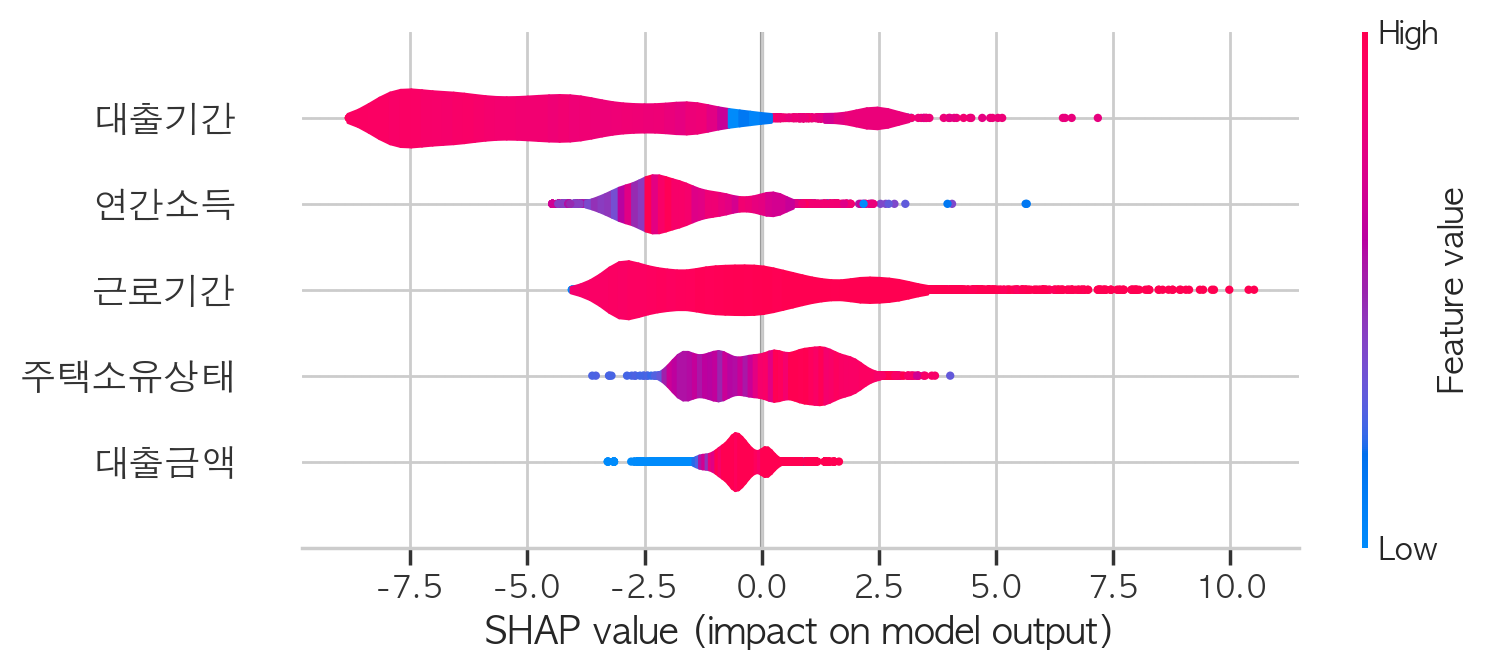

In [133]:
shap.summary_plot(shap_values[6], X_test[features], feature_names=X_test.columns, plot_type="violin", show=False)

In [63]:
# 대출등급별 ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액'] 분석

In [64]:
selected_df = train_df[['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액', '대출등급']]

In [65]:
selected_df.head()

대출기간     총상환원금     총상환이자   총상환대출비율    월별대출금액  대출등급
0   0.0  0.000000  0.000000  0.000000  0.658669     2
1   1.0  0.731015  0.795184  0.057717  0.555240     1
2   0.0  0.782895  0.767395  0.120407  0.647638     0
3   0.0  0.723224  0.767885  0.045690  0.698919     2
4   1.0  0.703018  0.766117  0.028984  0.618003     1

In [92]:
selected_df.columns.values

Index(['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액', '대출등급'], dtype='object')

In [91]:
plt.rcParams['font.family'] = 'AppleGothic'

In [93]:
selected_df = train_df[['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액', '대출등급']]

In [94]:
c0 = selected_df.loc[selected_df['대출등급']==0]
c1 = selected_df.loc[selected_df['대출등급']==1]
c2 = selected_df.loc[selected_df['대출등급']==2]
c3 = selected_df.loc[selected_df['대출등급']==3]
c4 = selected_df.loc[selected_df['대출등급']==4]
c5 = selected_df.loc[selected_df['대출등급']==5]
c6 = selected_df.loc[selected_df['대출등급']==6]

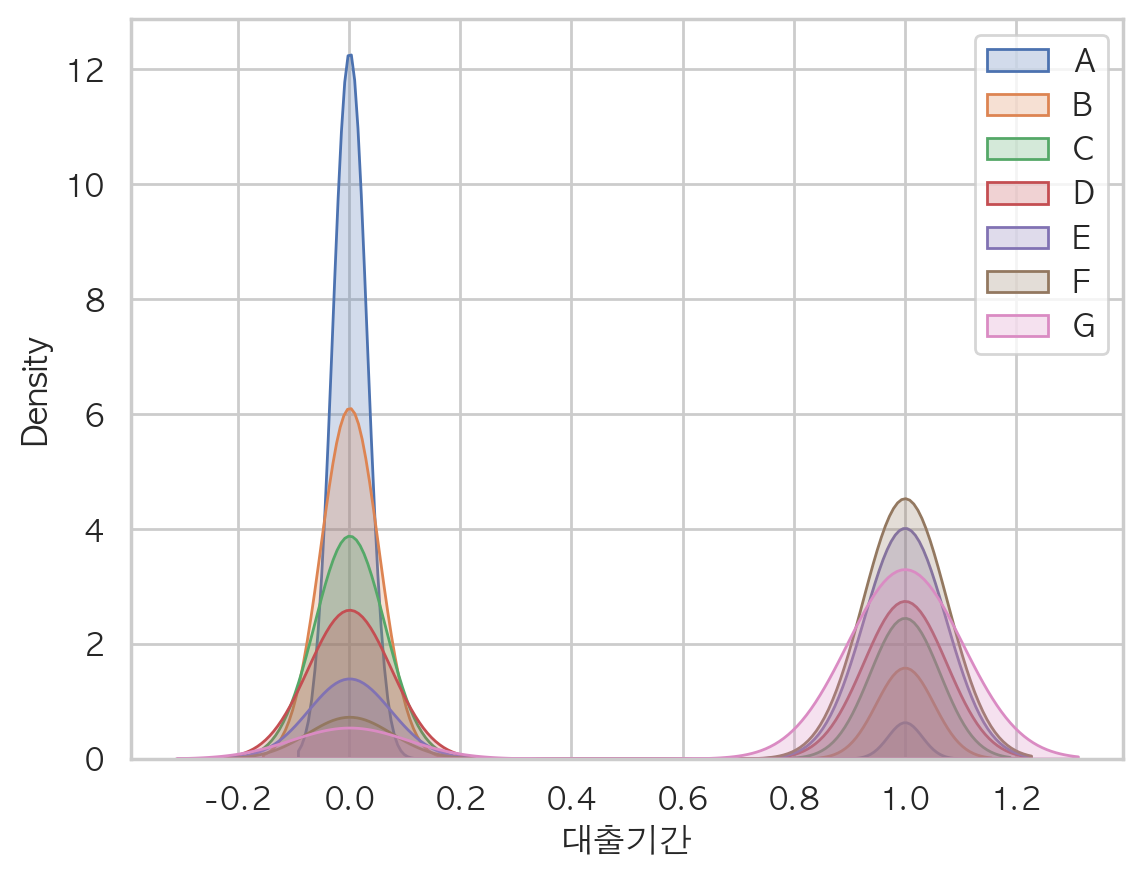

In [97]:
# KDE 플롯 그리기
sns.kdeplot(c0['대출기간'], label='A', shade=True)
sns.kdeplot(c1['대출기간'], label='B', shade=True)
sns.kdeplot(c2['대출기간'], label='C', shade=True)
sns.kdeplot(c3['대출기간'], label='D', shade=True)
sns.kdeplot(c4['대출기간'], label='E', shade=True)
sns.kdeplot(c5['대출기간'], label='F', shade=True)
sns.kdeplot(c6['대출기간'], label='G', shade=True)

plt.legend()

# 그래프 표시
plt.show()

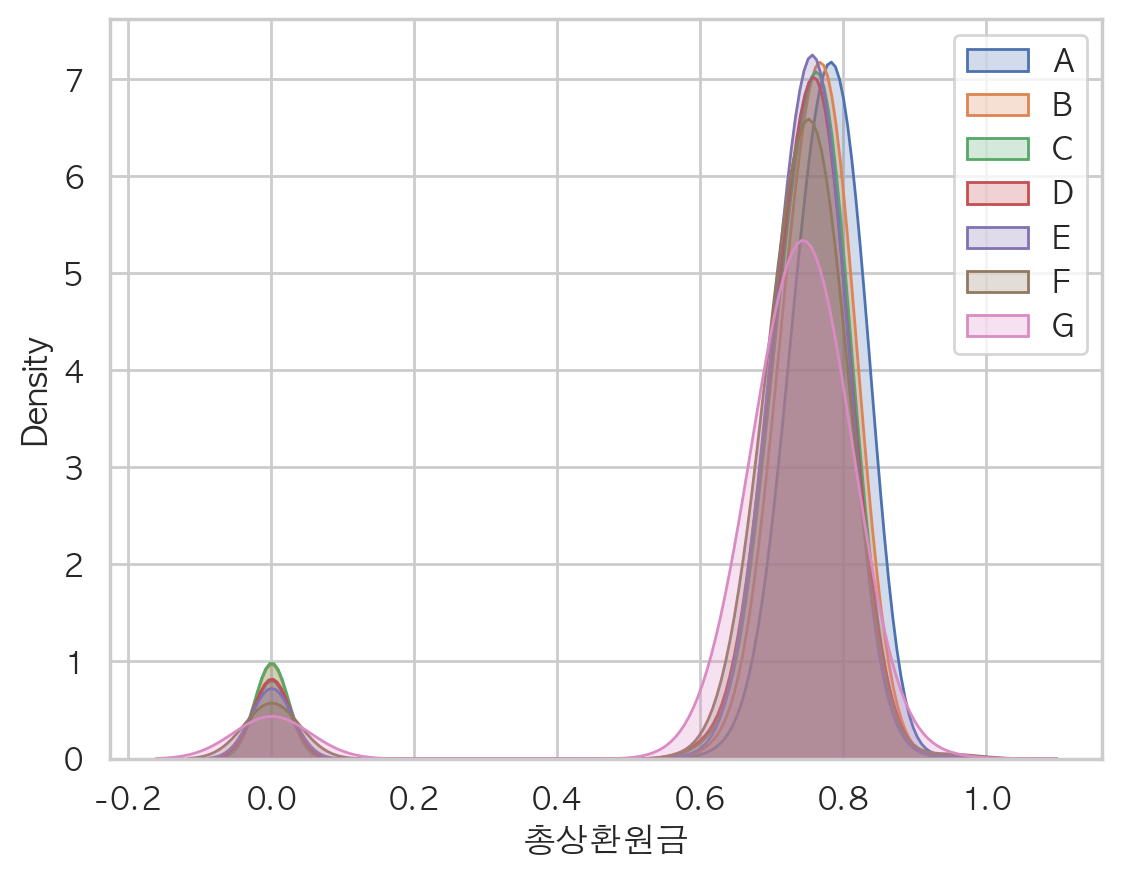

In [106]:
plt.rcParams['font.family'] = 'AppleGothic'

# KDE 플롯 그리기
sns.kdeplot(c0['총상환원금'], label='A', shade=True)
sns.kdeplot(c1['총상환원금'], label='B', shade=True)
sns.kdeplot(c2['총상환원금'], label='C', shade=True)
sns.kdeplot(c3['총상환원금'], label='D', shade=True)
sns.kdeplot(c4['총상환원금'], label='E', shade=True)
sns.kdeplot(c5['총상환원금'], label='F', shade=True)
sns.kdeplot(c6['총상환원금'], label='G', shade=True)

plt.legend()

# 그래프 표시
plt.show()

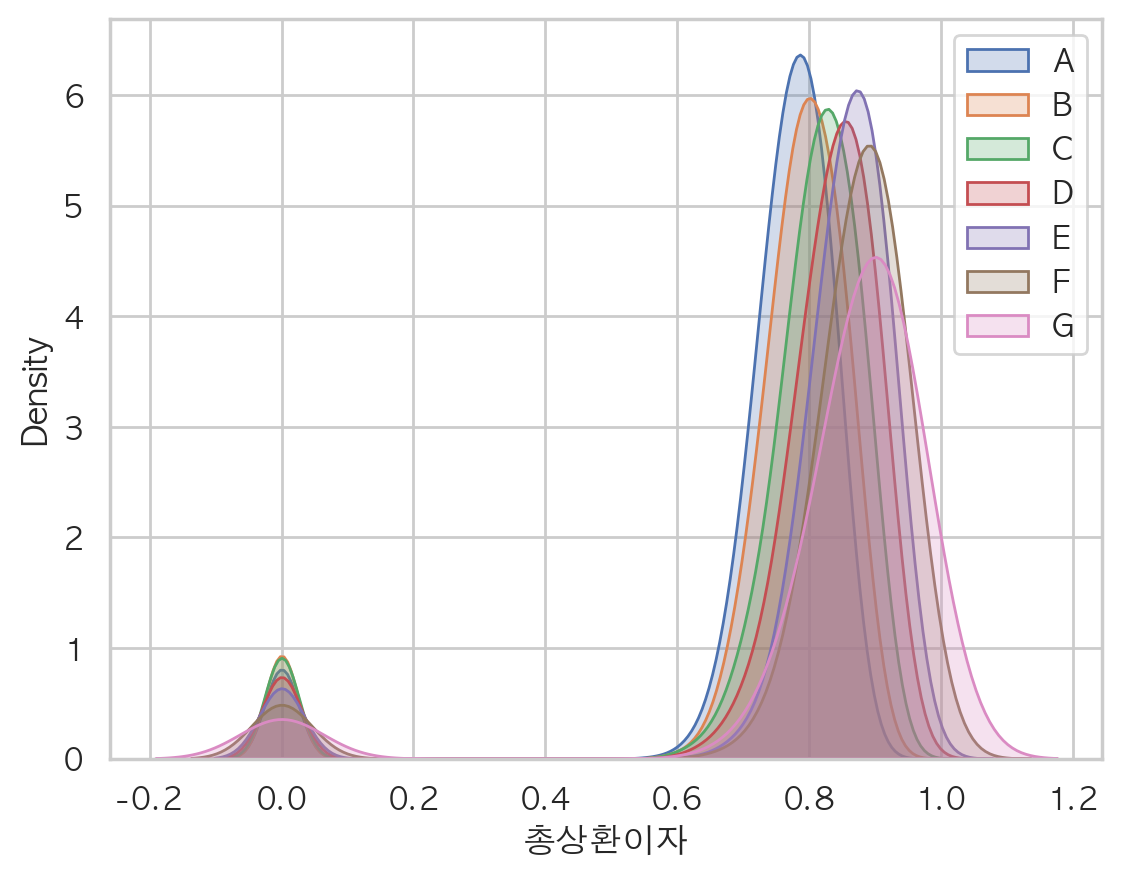

In [108]:
# KDE 플롯 그리기
sns.kdeplot(c0['총상환이자'], label='A', shade=True)
sns.kdeplot(c1['총상환이자'], label='B', shade=True)
sns.kdeplot(c2['총상환이자'], label='C', shade=True)
sns.kdeplot(c3['총상환이자'], label='D', shade=True)
sns.kdeplot(c4['총상환이자'], label='E', shade=True)
sns.kdeplot(c5['총상환이자'], label='F', shade=True)
sns.kdeplot(c6['총상환이자'], label='G', shade=True)

plt.legend()

# 그래프 표시
plt.show()

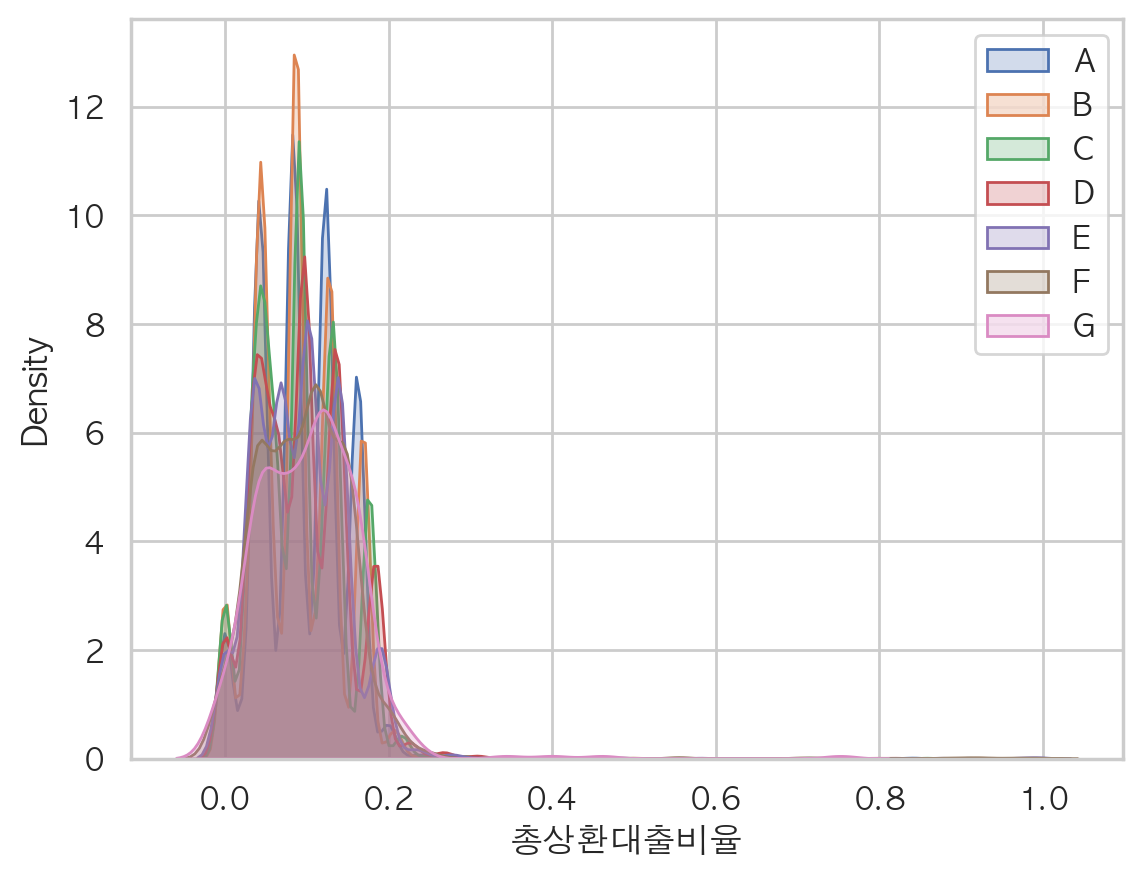

In [109]:
# KDE 플롯 그리기
sns.kdeplot(c0['총상환대출비율'], label='A', shade=True)
sns.kdeplot(c1['총상환대출비율'], label='B', shade=True)
sns.kdeplot(c2['총상환대출비율'], label='C', shade=True)
sns.kdeplot(c3['총상환대출비율'], label='D', shade=True)
sns.kdeplot(c4['총상환대출비율'], label='E', shade=True)
sns.kdeplot(c5['총상환대출비율'], label='F', shade=True)
sns.kdeplot(c6['총상환대출비율'], label='G', shade=True)

plt.legend()

# 그래프 표시
plt.show()

In [133]:
d0 = train_df.loc[train_df['대출등급']==0]
d1 = train_df.loc[train_df['대출등급']==1]
d2 = train_df.loc[train_df['대출등급']==2]
d3 = train_df.loc[train_df['대출등급']==3]
d4 = train_df.loc[train_df['대출등급']==4]
d5 = train_df.loc[train_df['대출등급']==5]
d6 = train_df.loc[train_df['대출등급']==6]

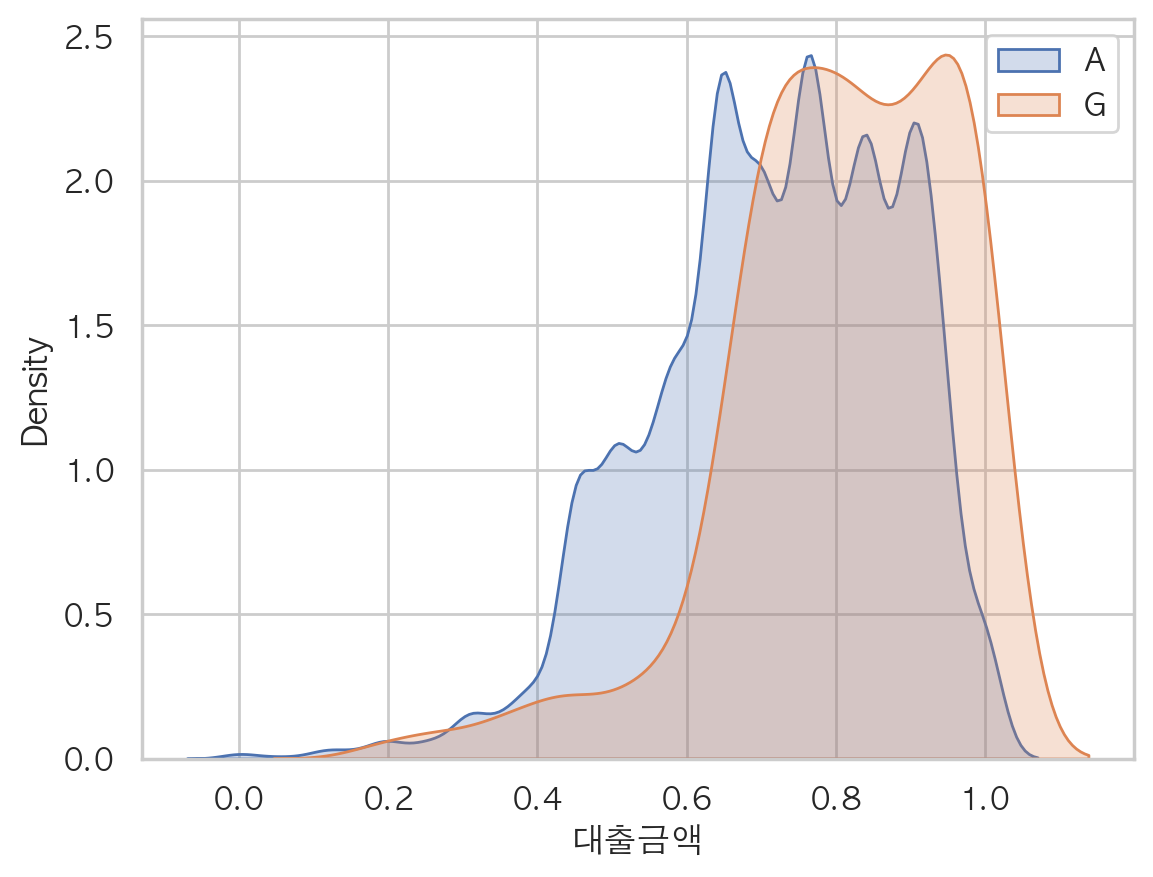

In [135]:
# KDE 플롯 그리기
sns.kdeplot(d0['대출금액'], label='A', shade=True)
sns.kdeplot(d6['대출금액'], label='G', shade=True)

plt.legend()

# 그래프 표시
plt.show()

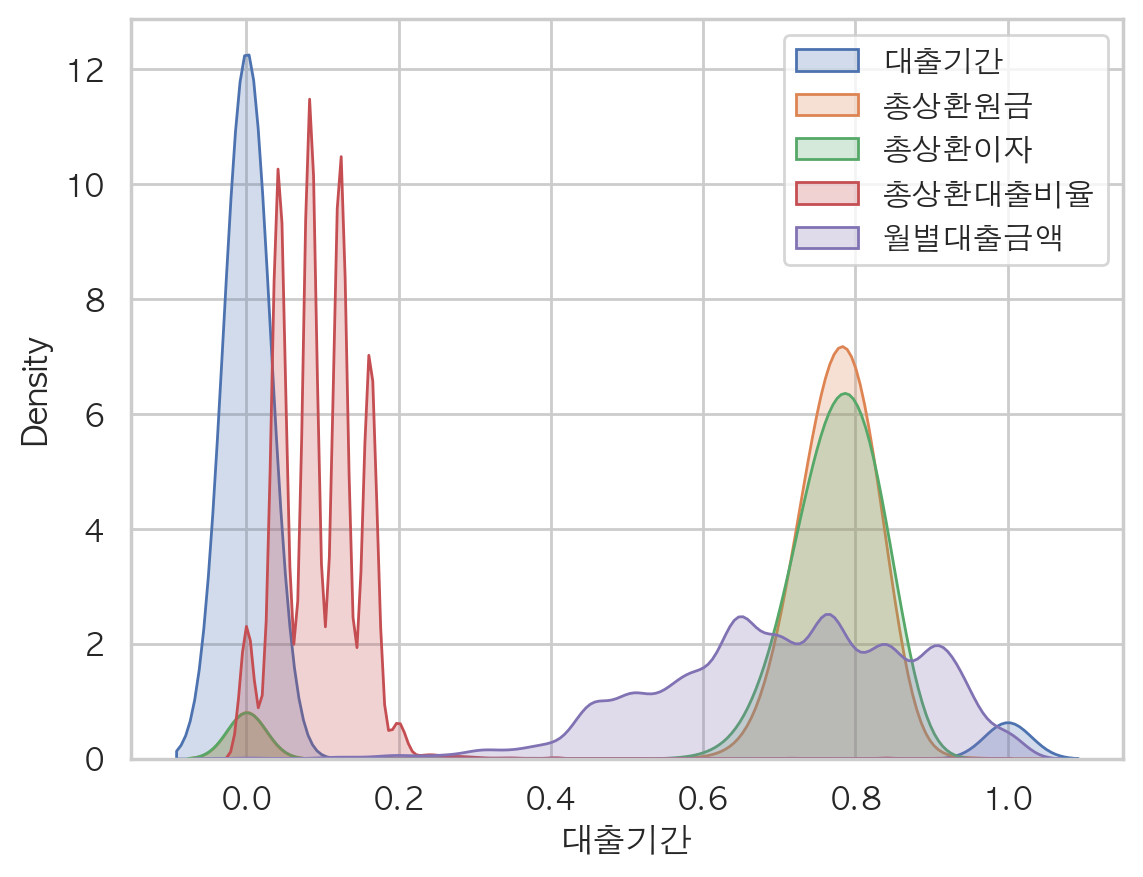

In [111]:
# [['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액', '대출등급']]

# KDE 플롯 그리기
sns.kdeplot(c0['대출기간'], label='대출기간', shade=True)
sns.kdeplot(c0['총상환원금'], label='총상환원금', shade=True)
sns.kdeplot(c0['총상환이자'], label='총상환이자', shade=True)
sns.kdeplot(c0['총상환대출비율'], label='총상환대출비율', shade=True)
sns.kdeplot(c0['월별대출금액'], label='월별대출금액', shade=True)


plt.legend()

# 그래프 표시
plt.show()

In [124]:
def make_kde(data:pd.DataFrame, columns:list, c_level):
 
    plt.figure(figsize=(15, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        # 히스토그램 그리기
        sns.kdeplot(c_level[col], label=col, shade=True)
        

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()

In [114]:
features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

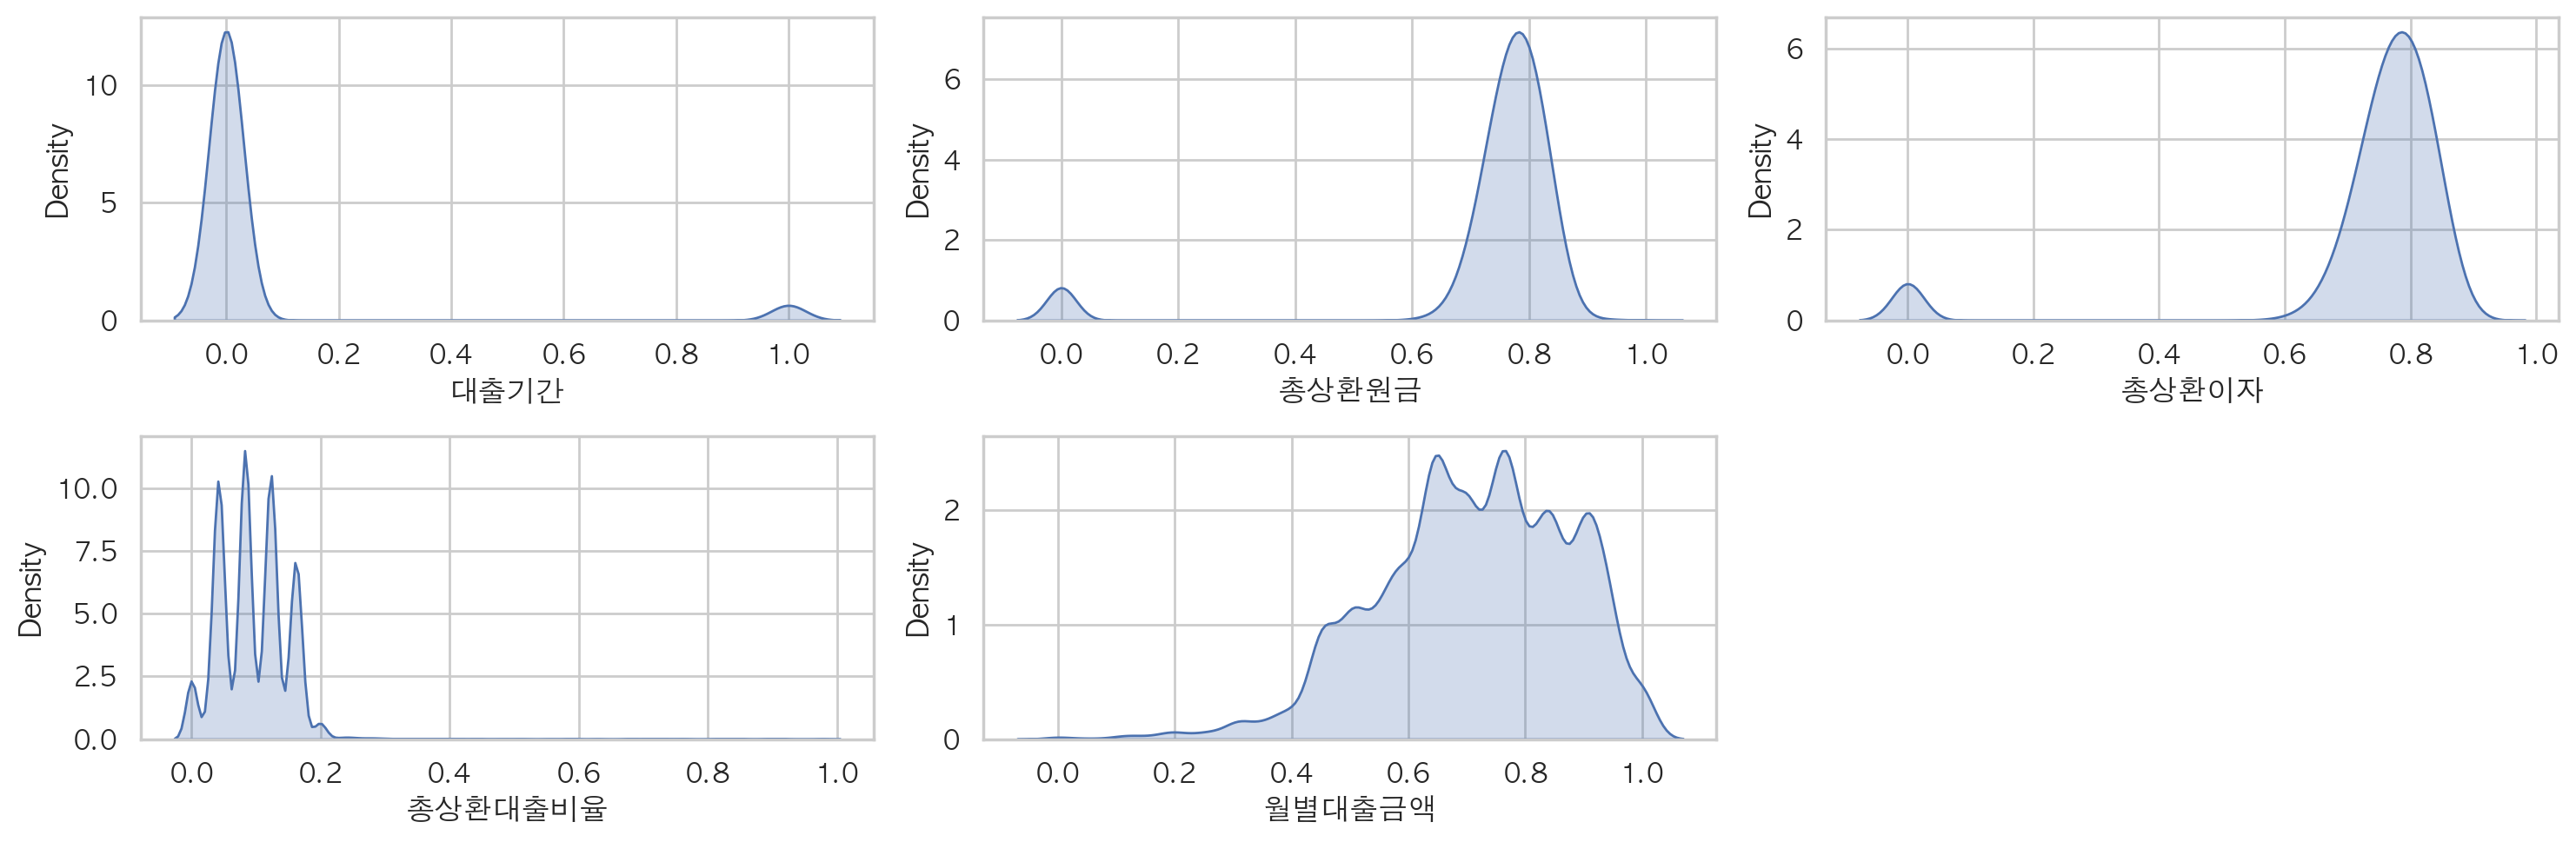

In [125]:
make_kde(selected_df, features, c0)

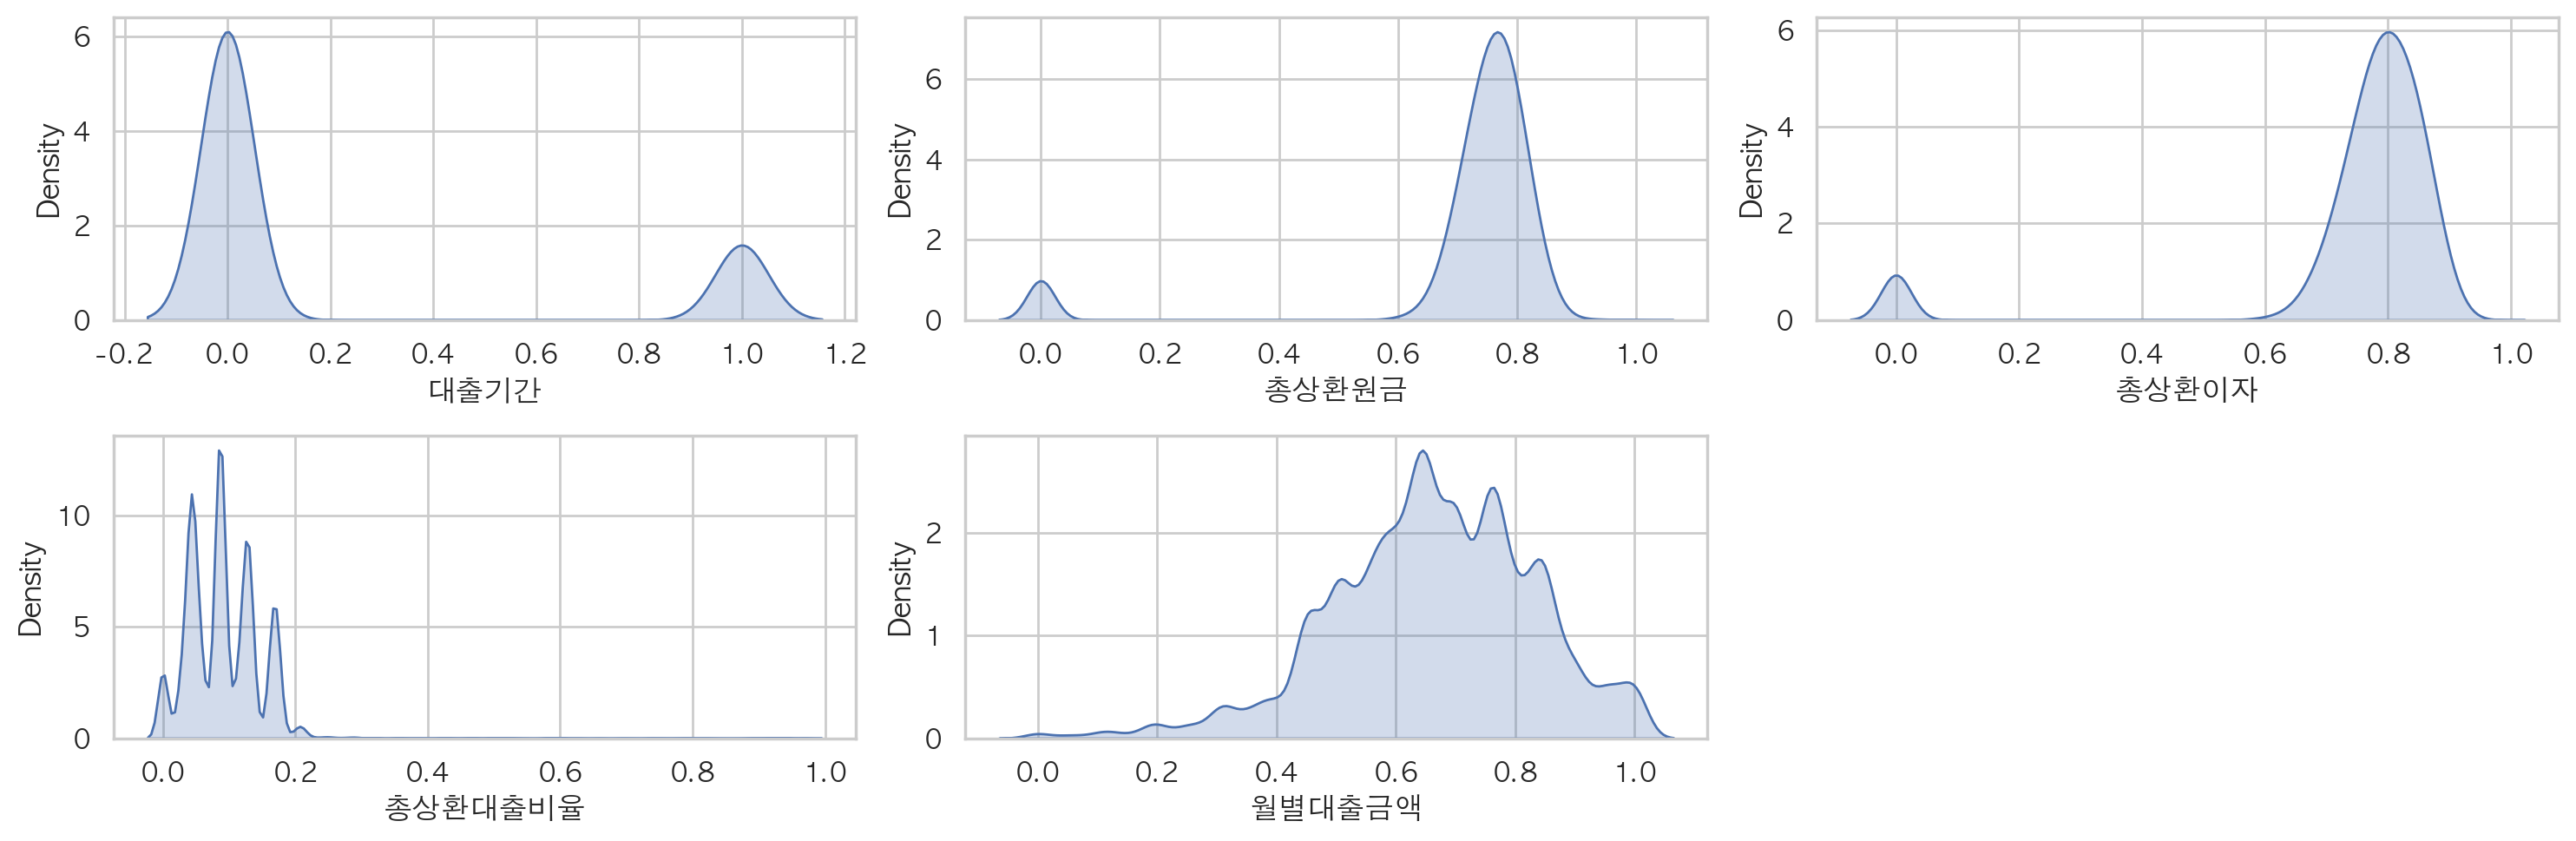

In [126]:
make_kde(selected_df, features, c1)

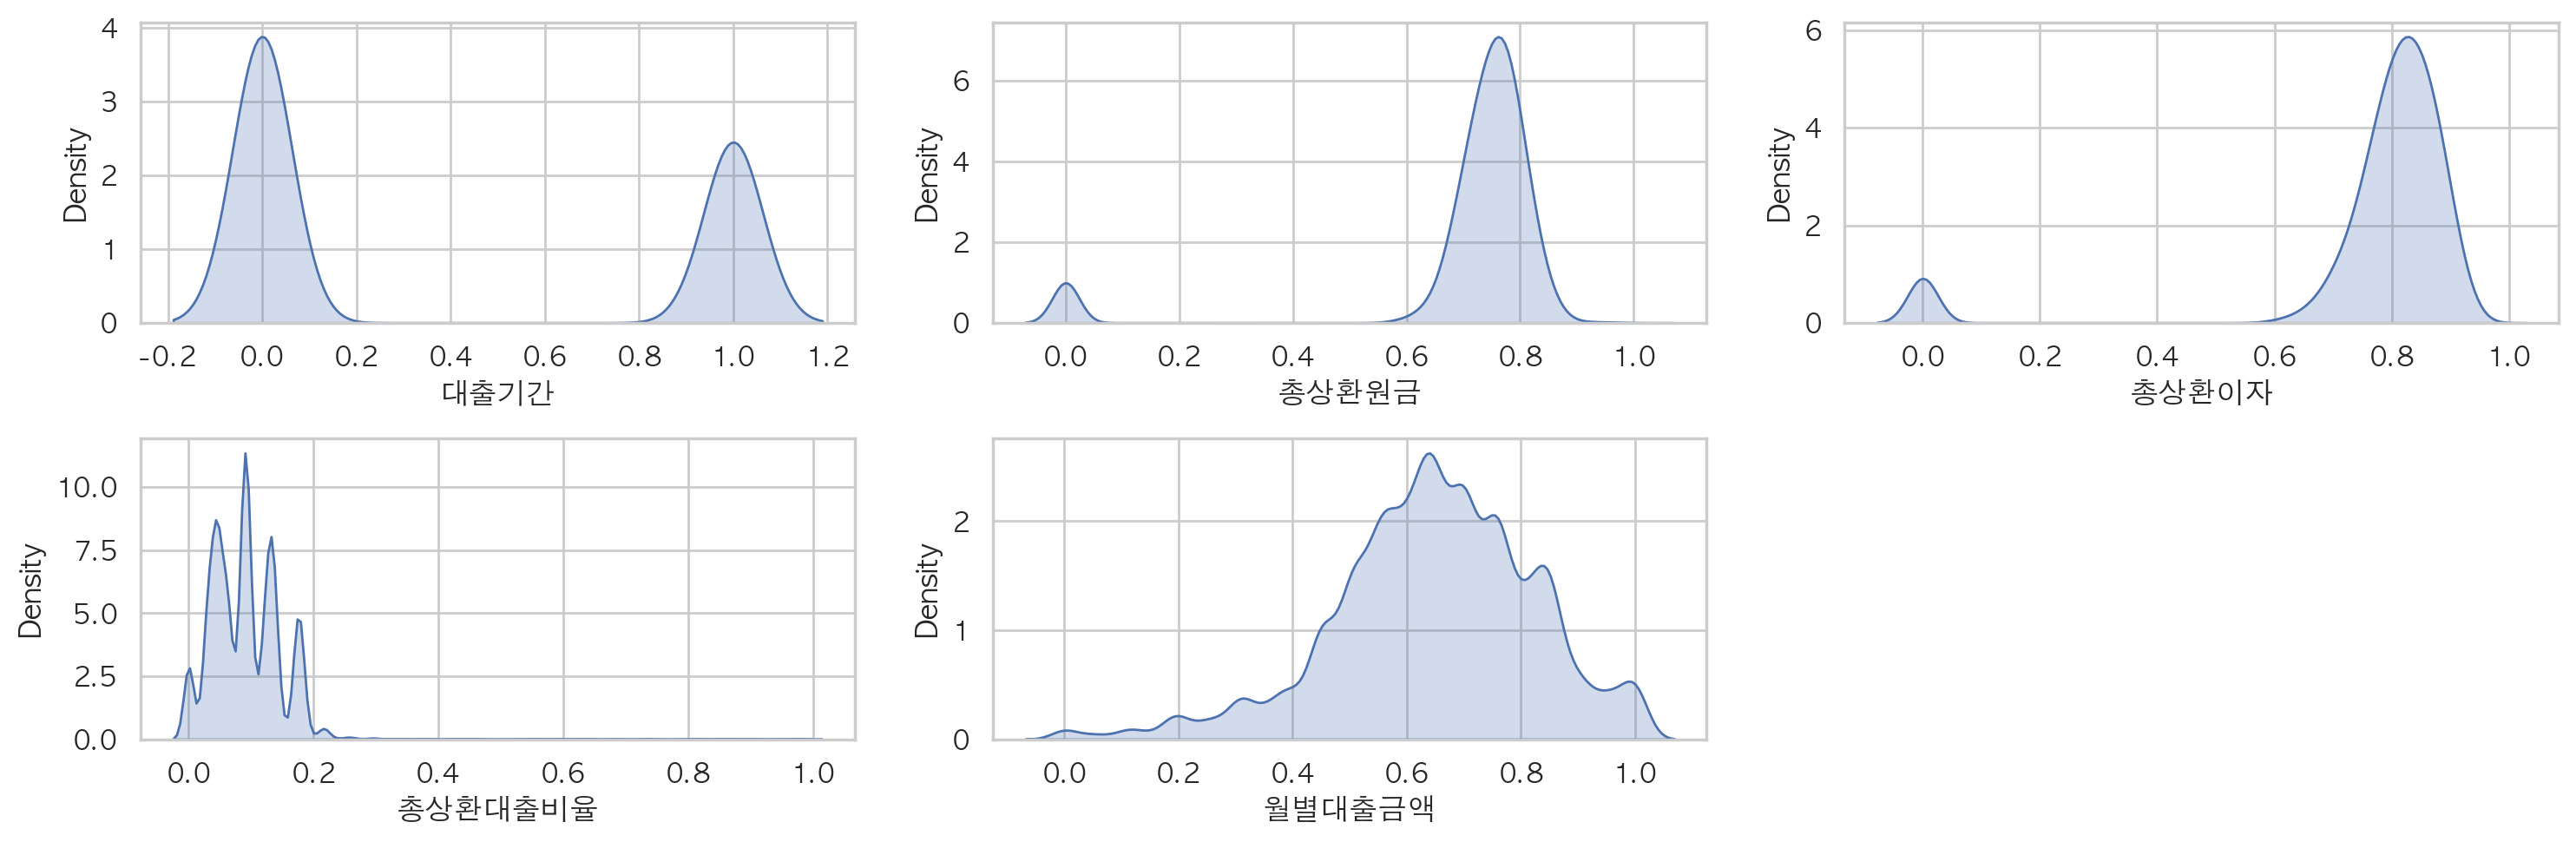

In [127]:
make_kde(selected_df, features, c2)

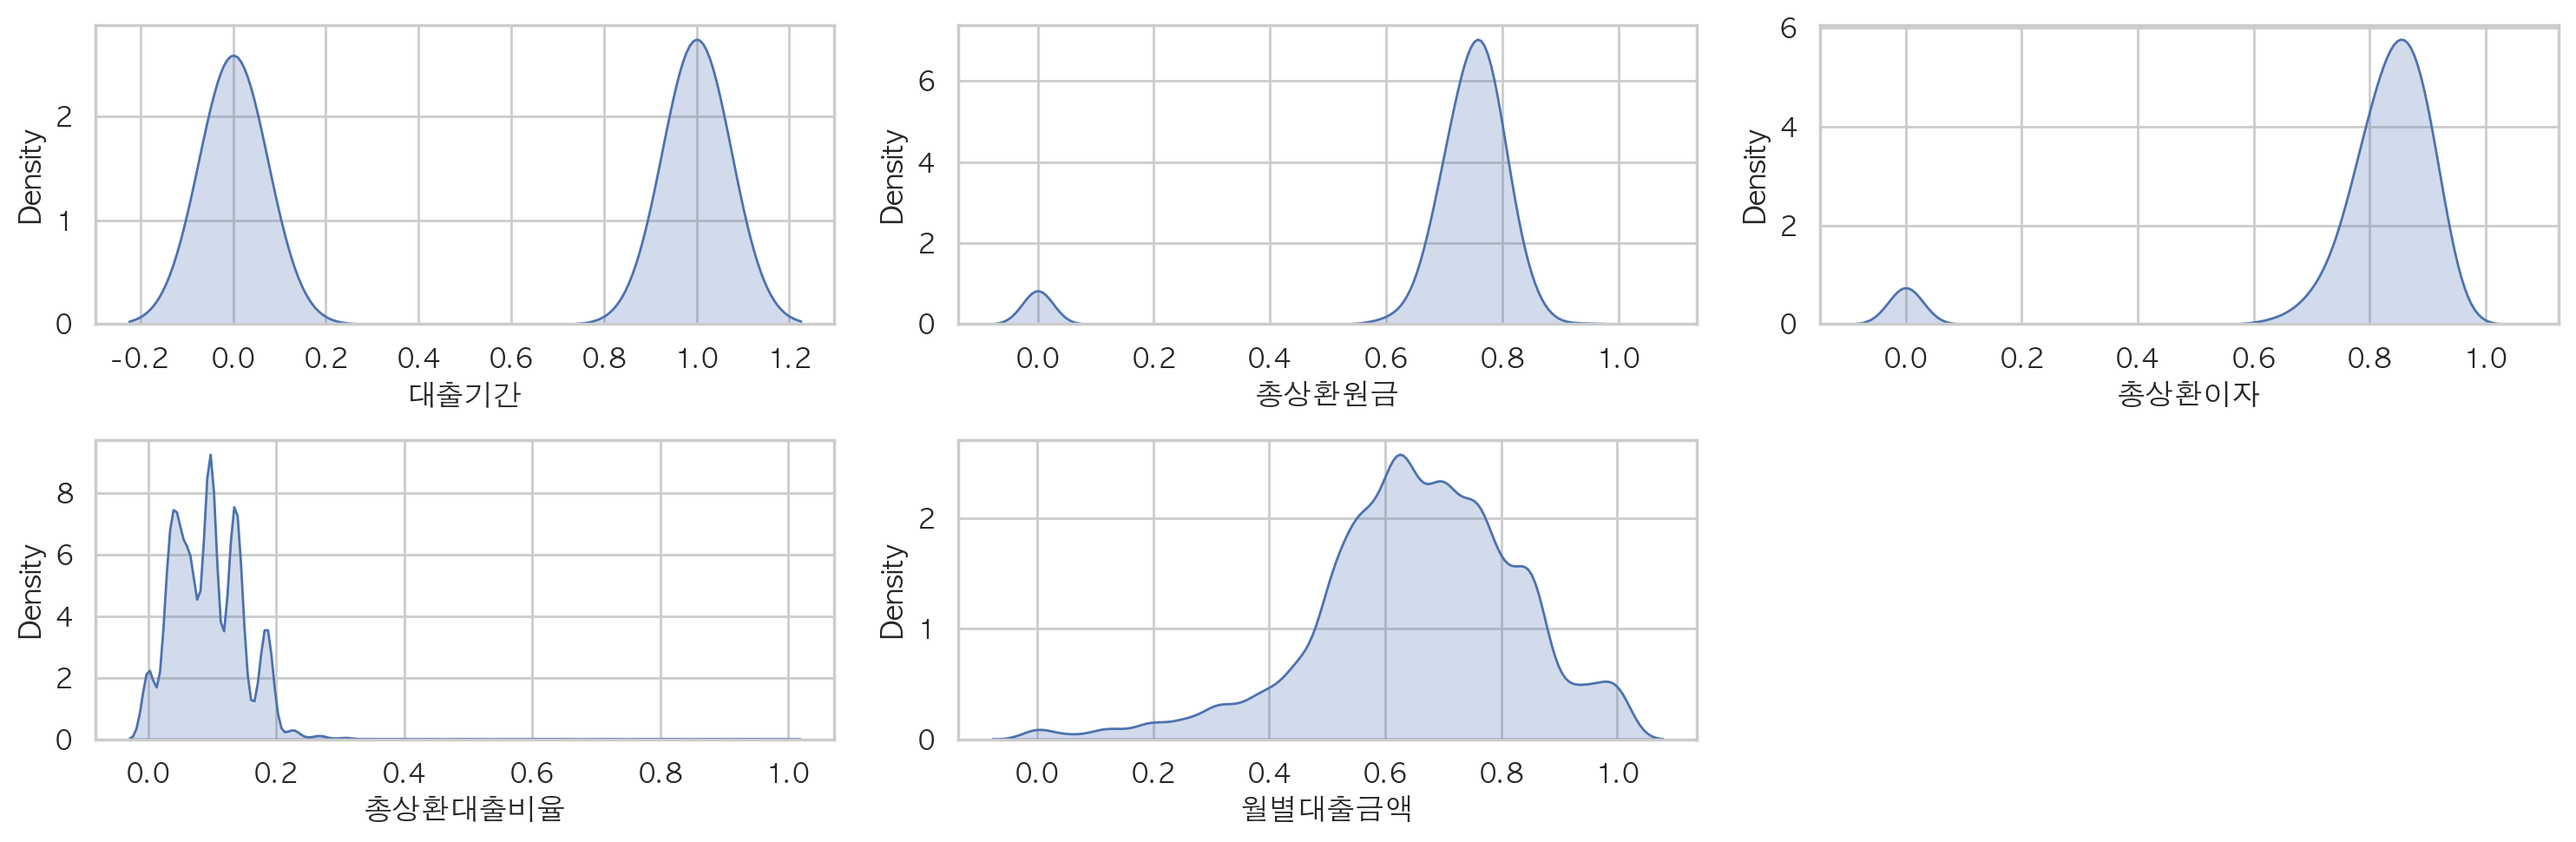

In [128]:
make_kde(selected_df, features, c3)

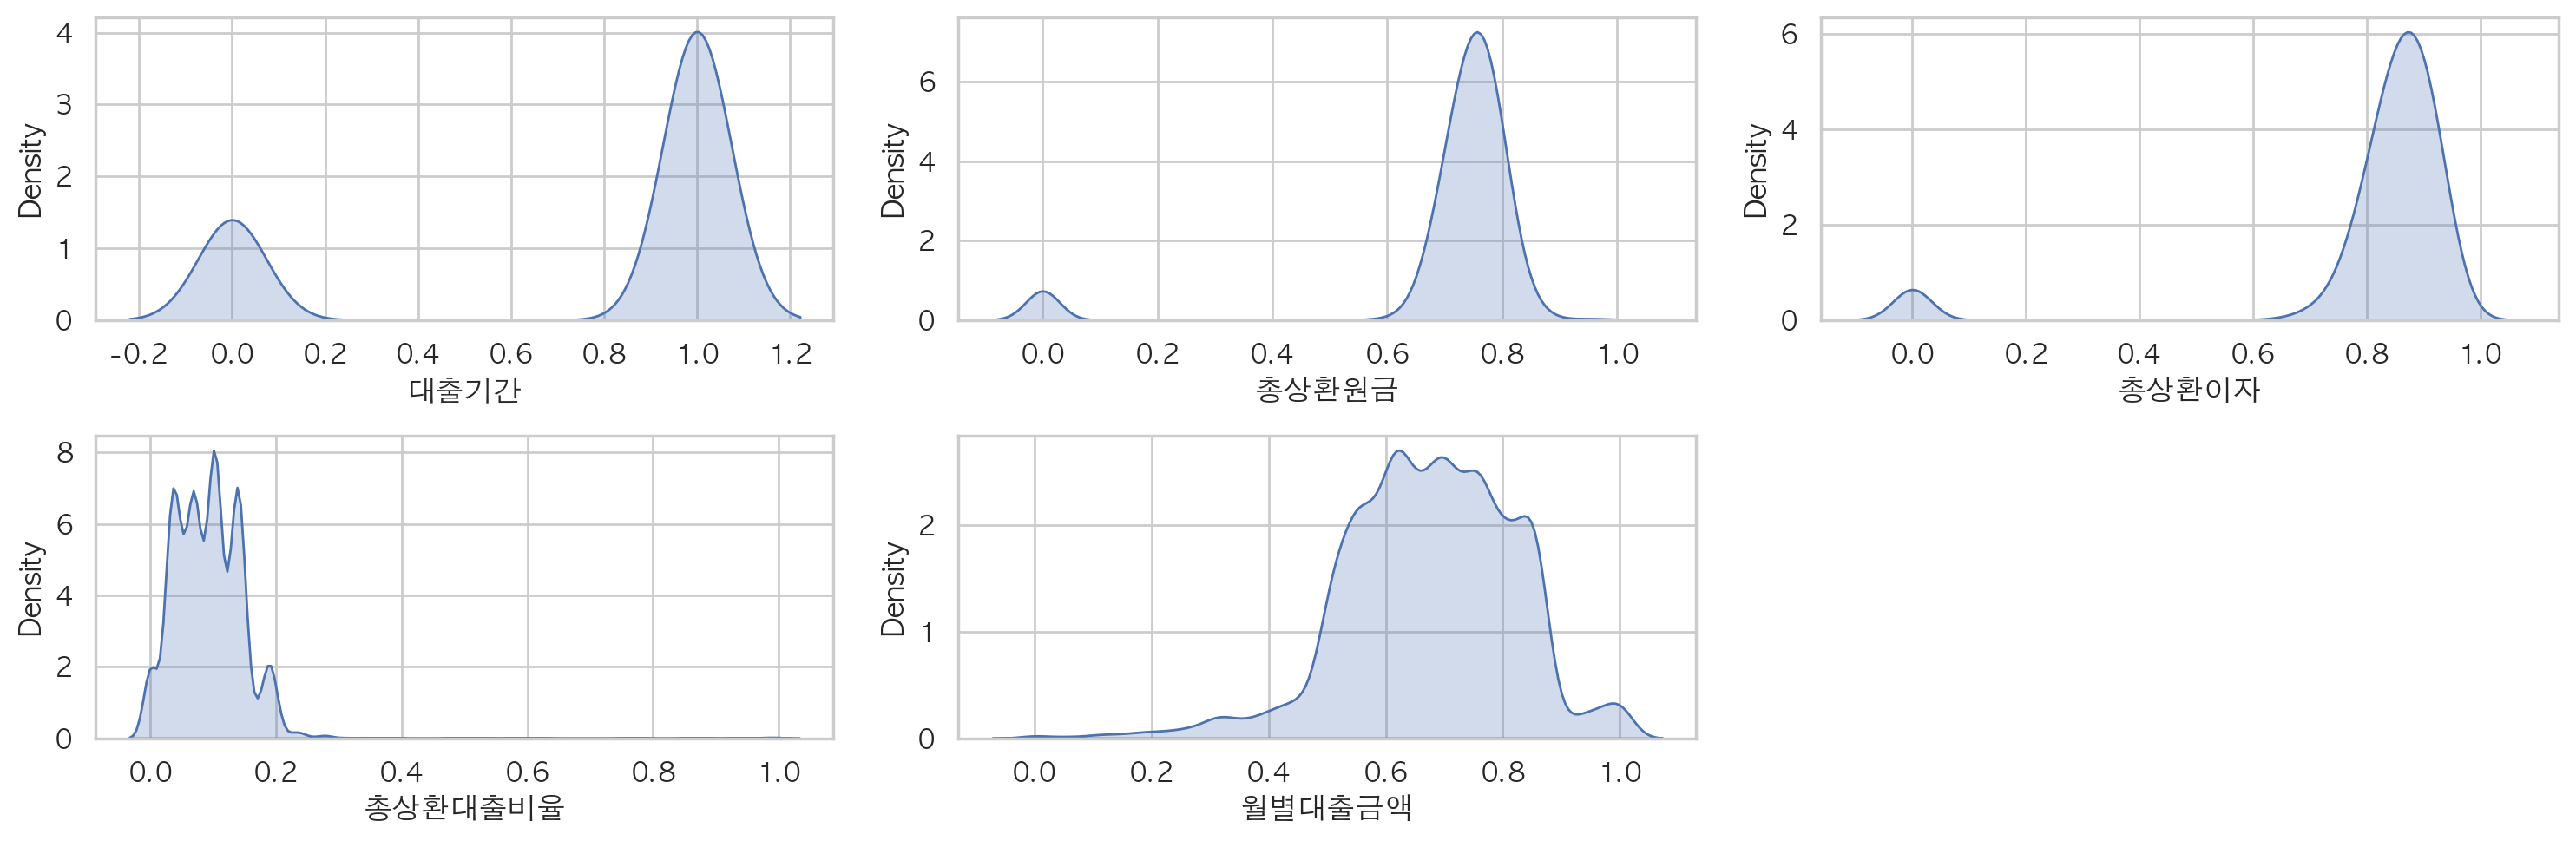

In [129]:
make_kde(selected_df, features, c4)

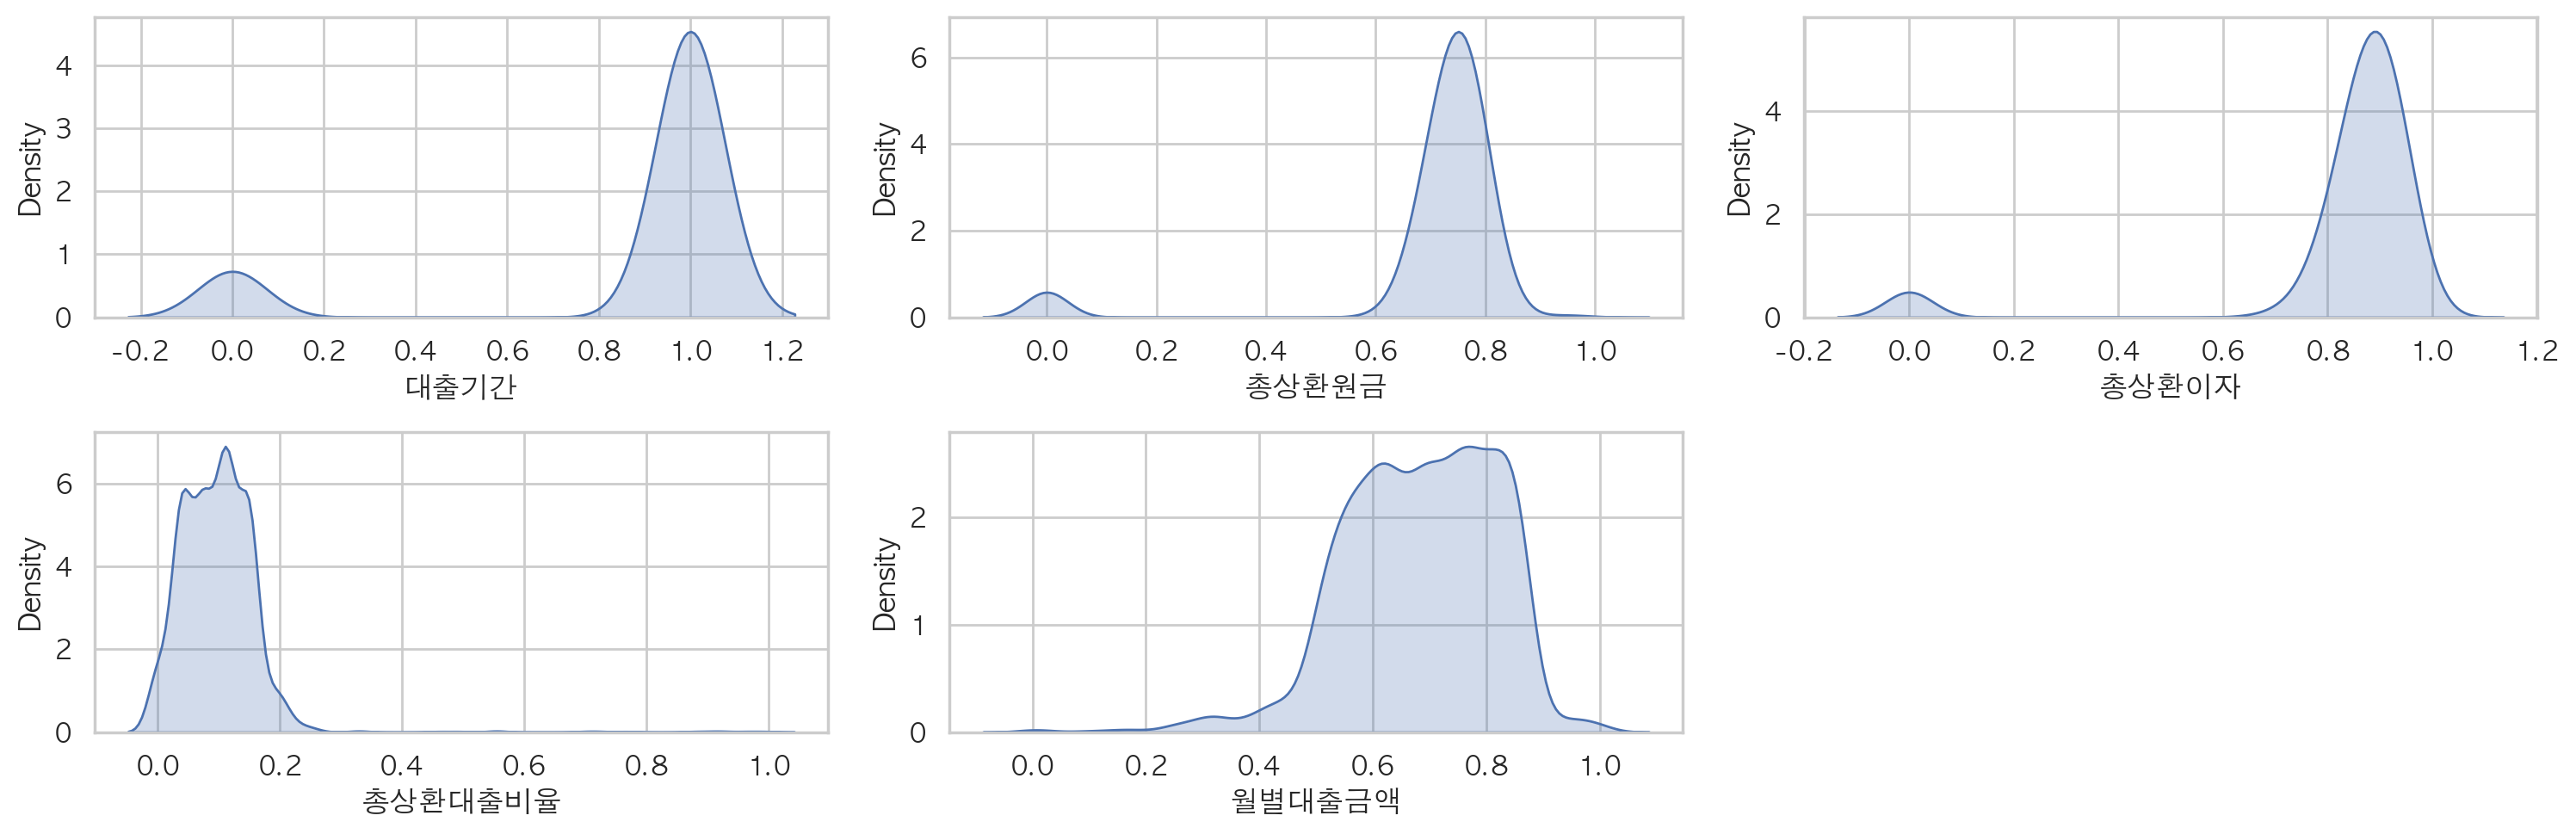

In [130]:
make_kde(selected_df, features, c5)

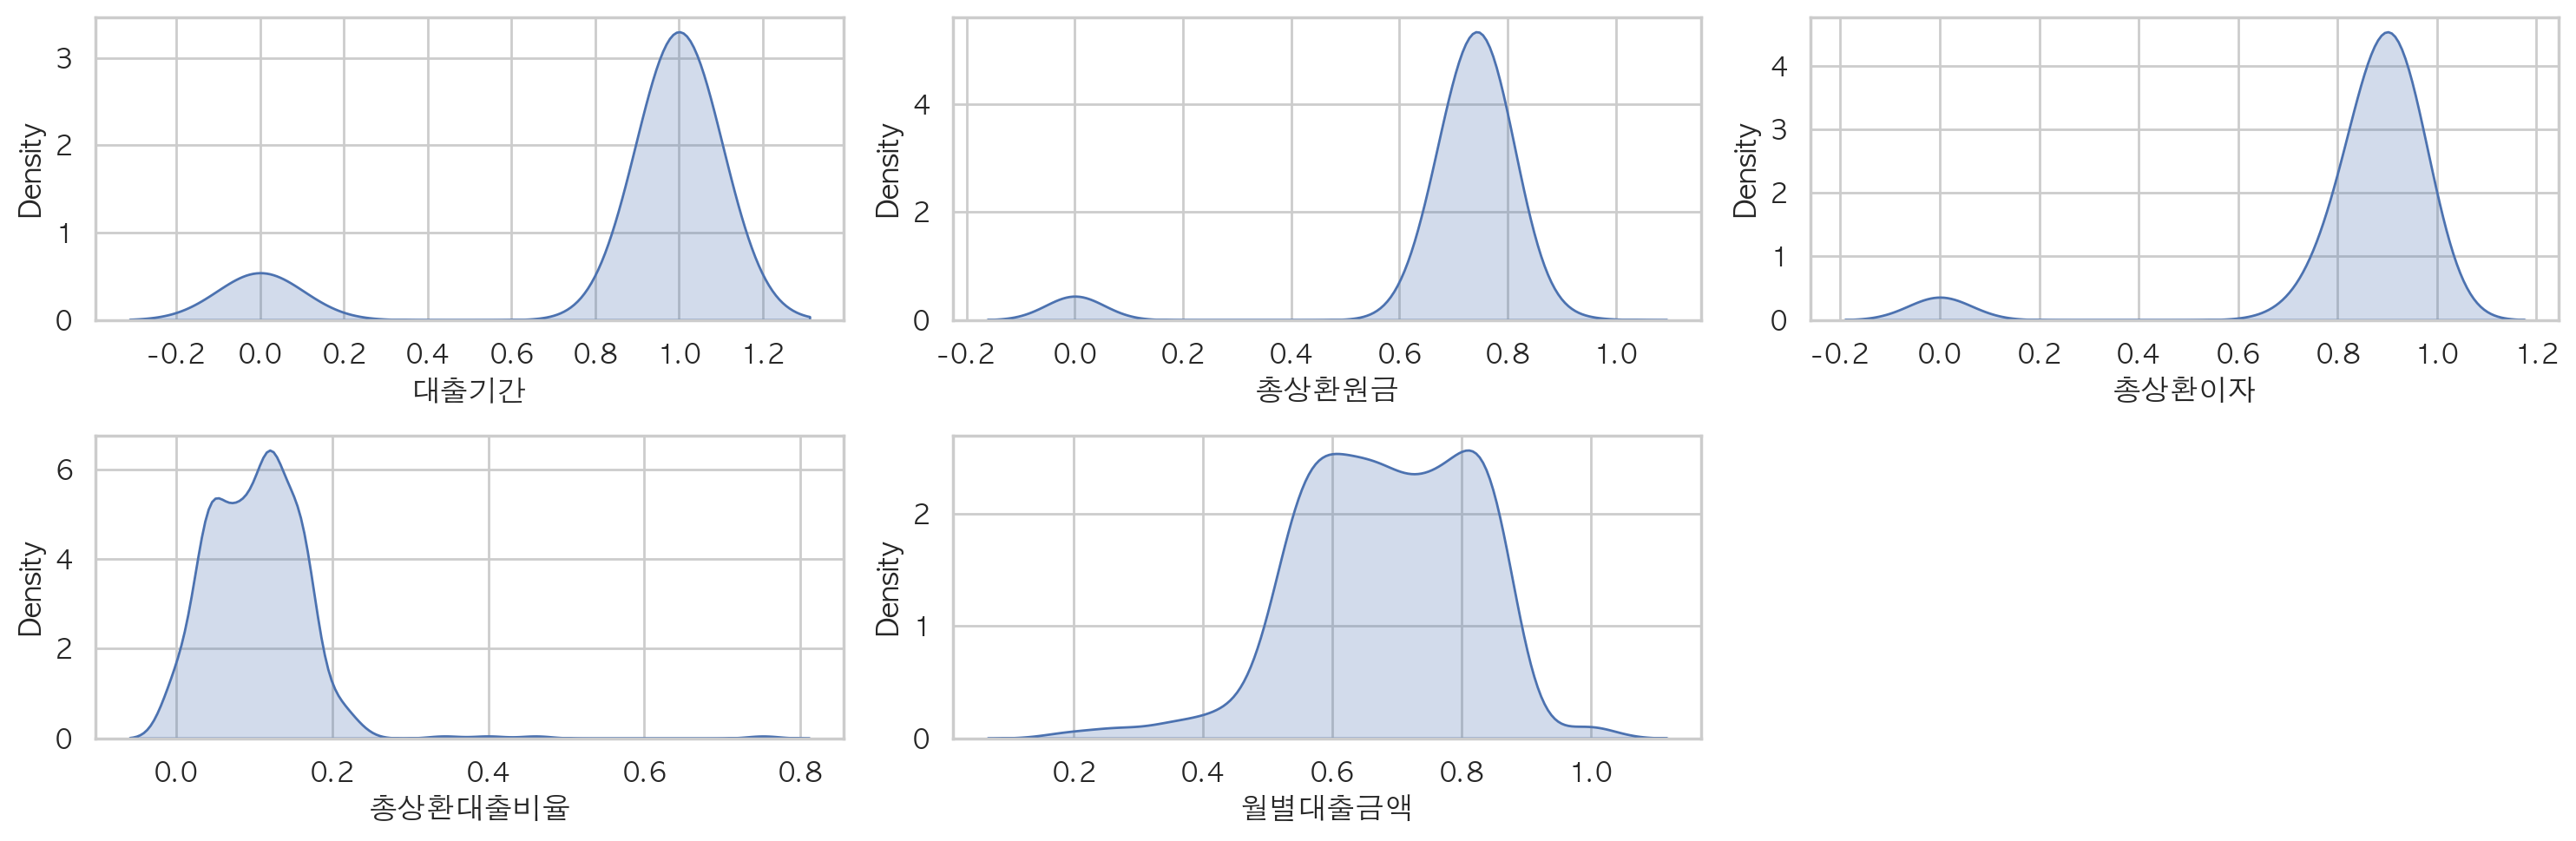

In [131]:
make_kde(selected_df, features, c6)

In [139]:
features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

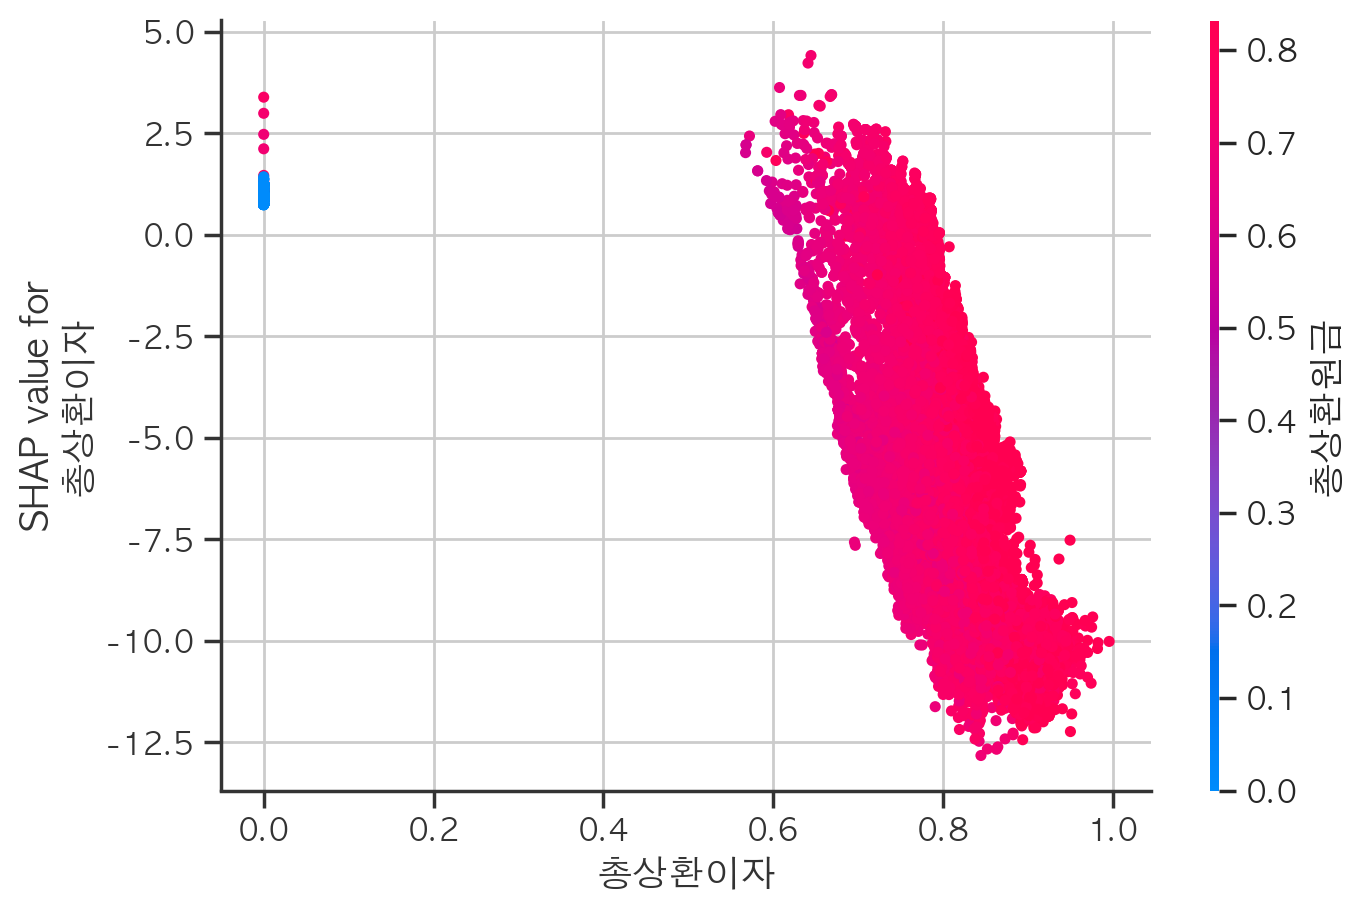

In [143]:
shap.dependence_plot("총상환이자", shap_values[0], X_test[features], interaction_index="총상환원금")

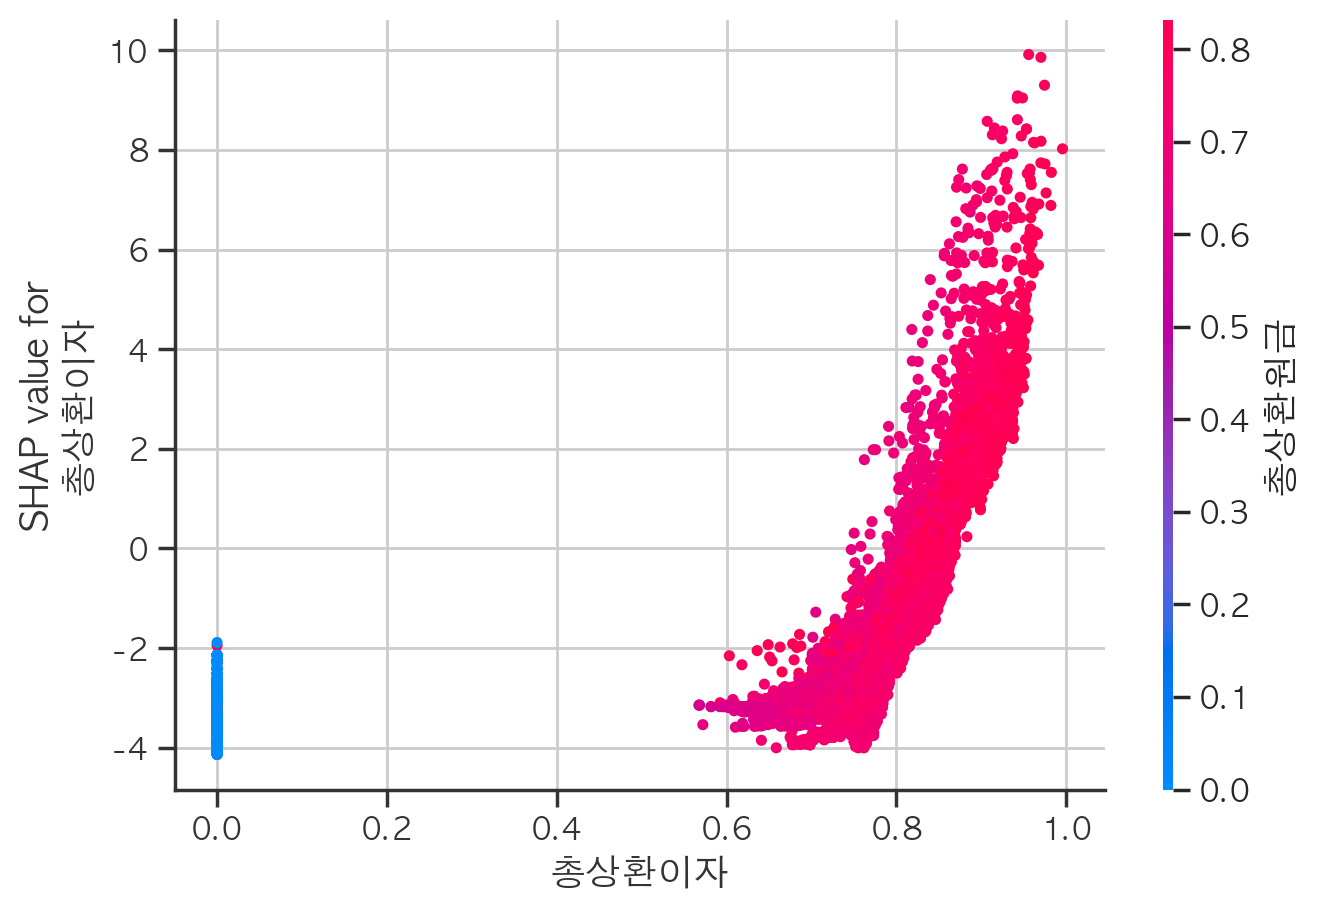

In [144]:
shap.dependence_plot("총상환이자", shap_values[6], X_test[features], interaction_index="총상환원금")

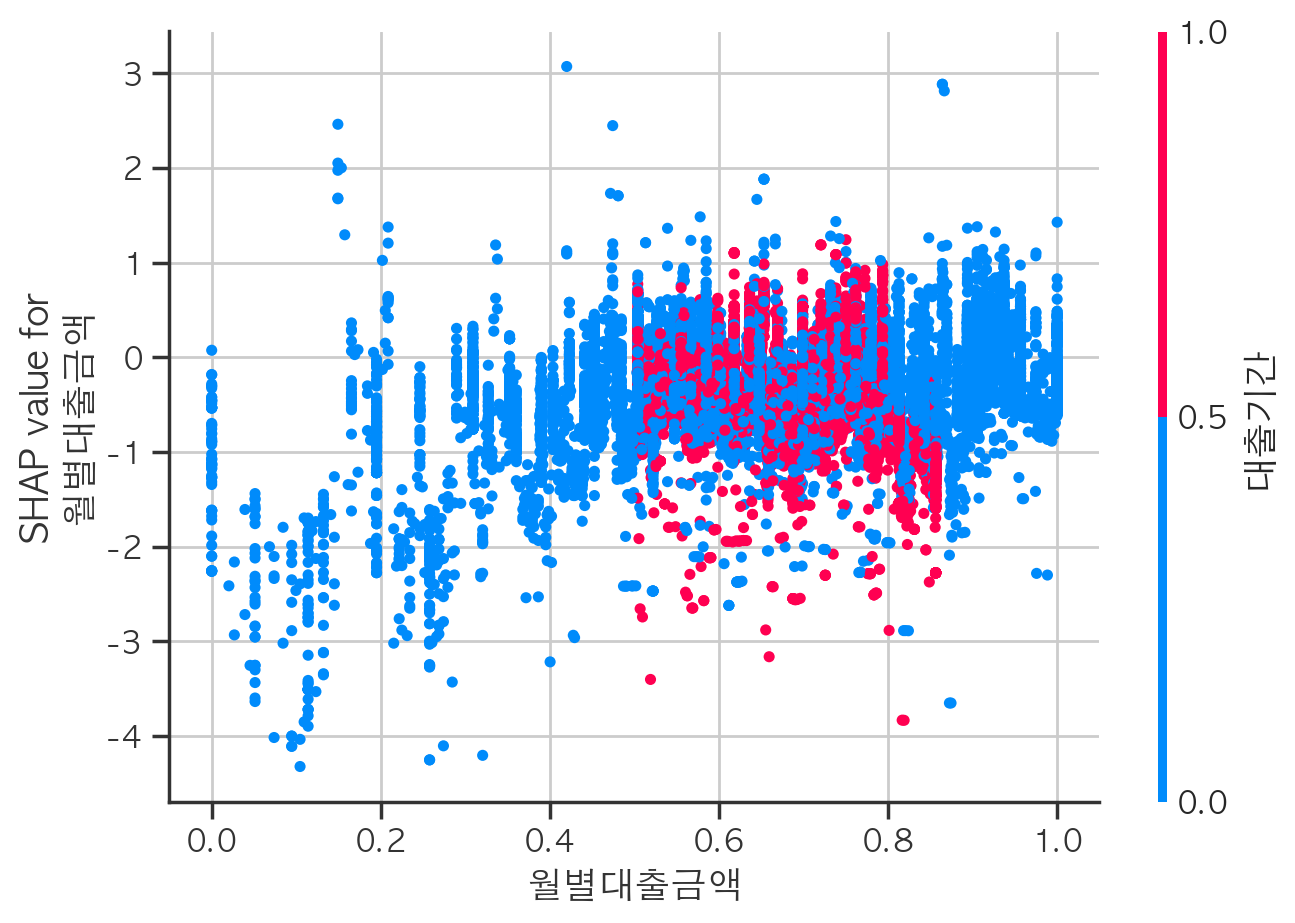

In [146]:
shap.dependence_plot("월별대출금액", shap_values[0], X_test[features], interaction_index="대출기간")

In [ ]:
#features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

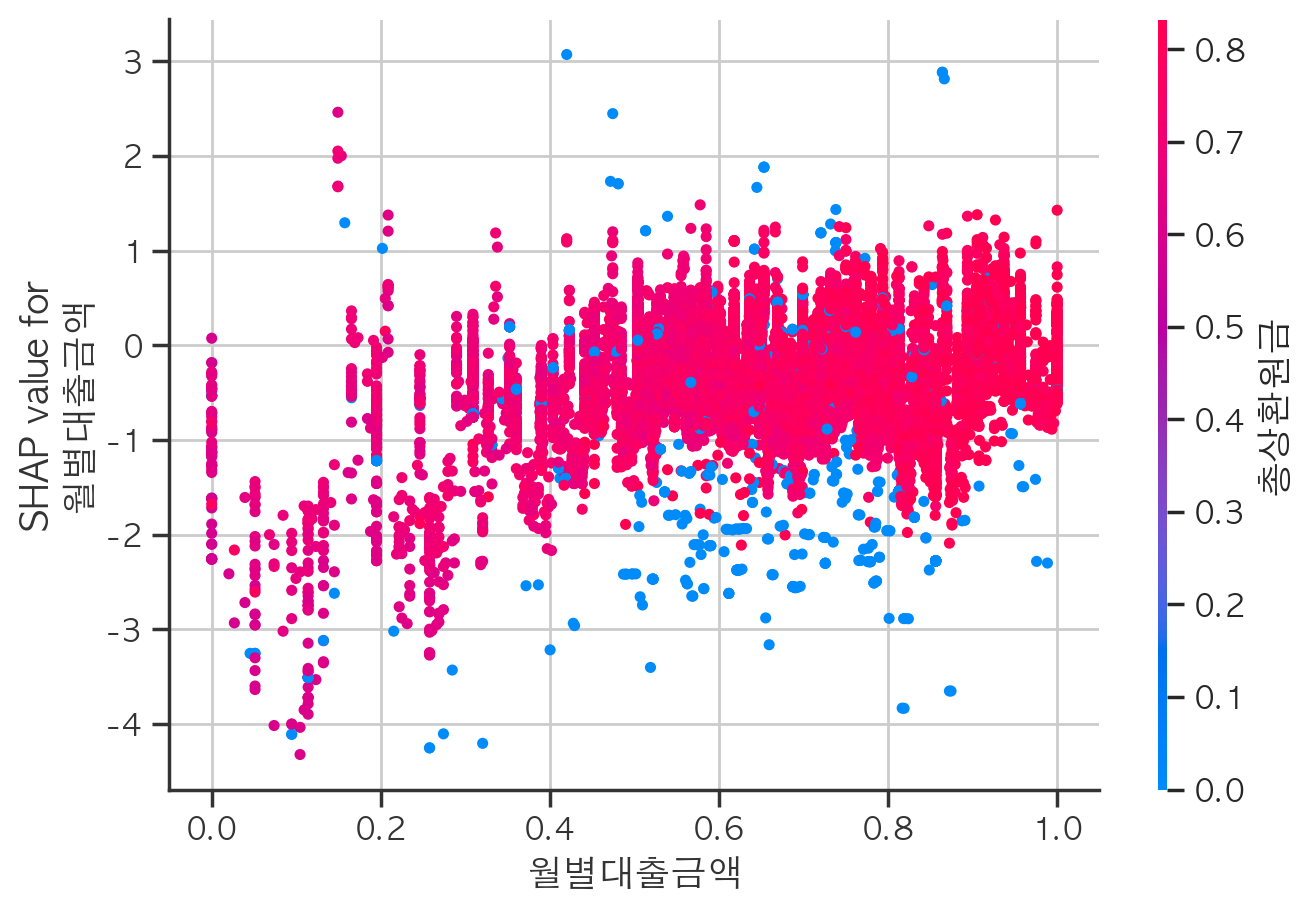

In [147]:
shap.dependence_plot("월별대출금액", shap_values[0], X_test[features], interaction_index="총상환원금")

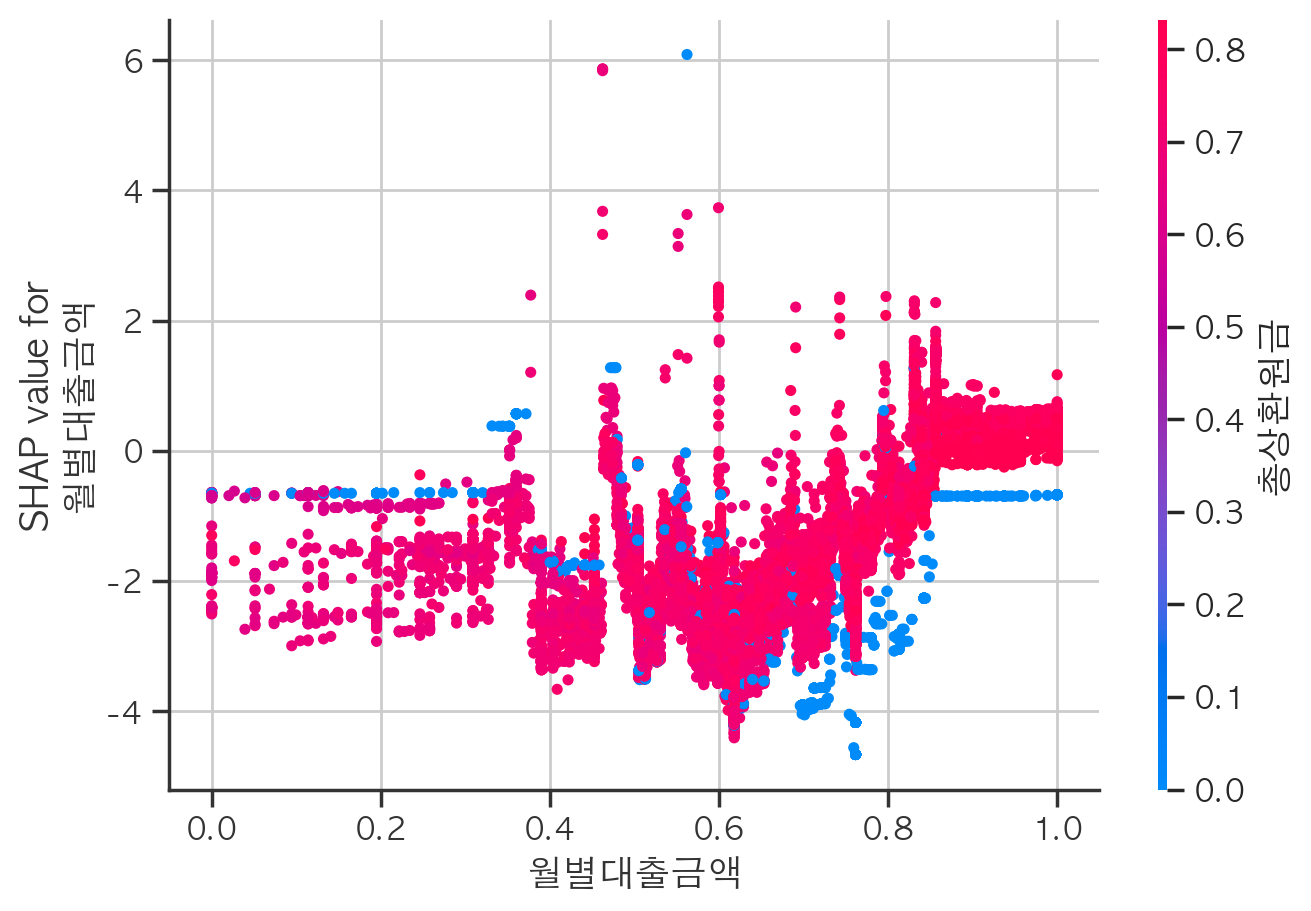

In [148]:
shap.dependence_plot("월별대출금액", shap_values[6], X_test[features], interaction_index="총상환원금")

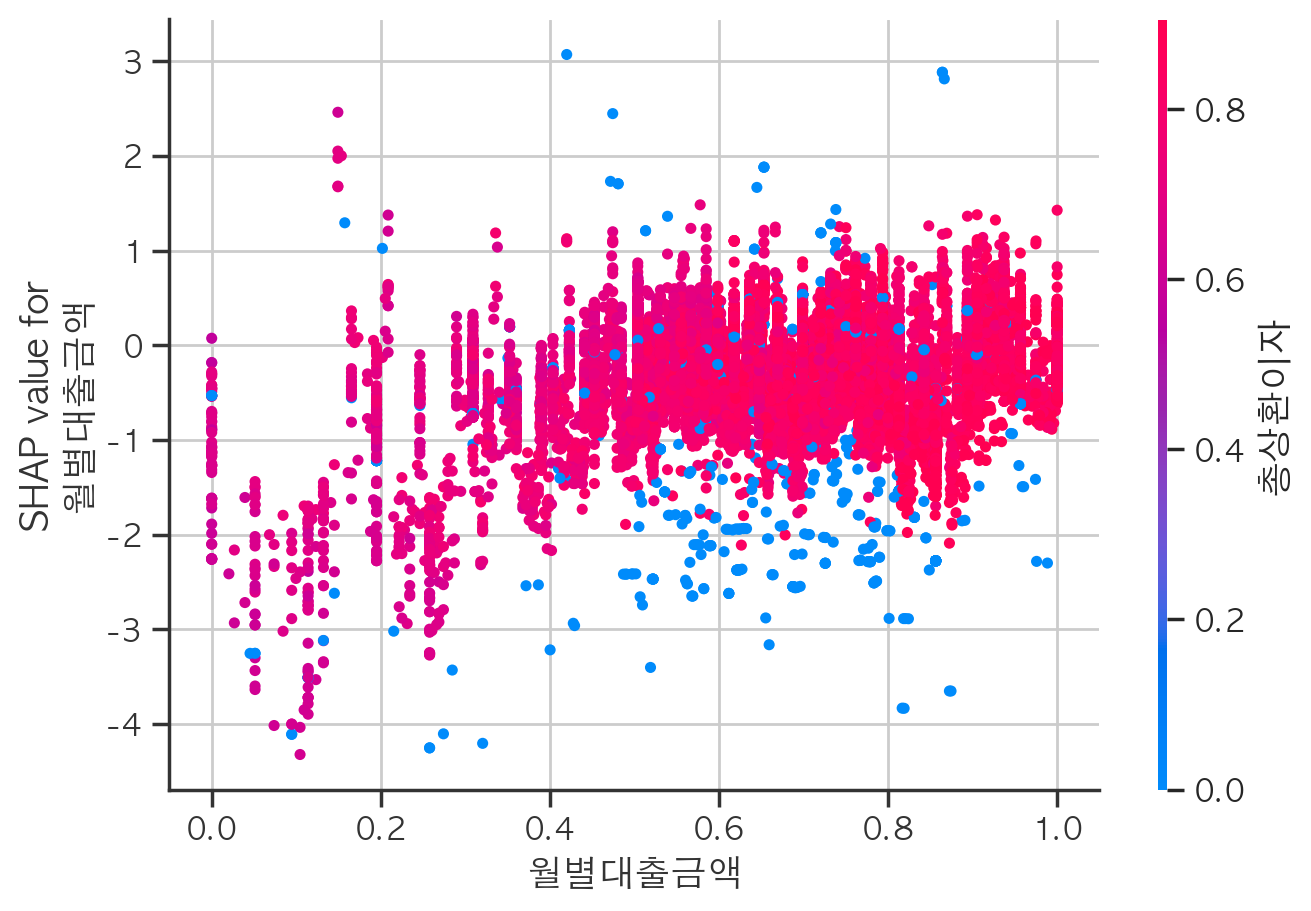

In [149]:
shap.dependence_plot("월별대출금액", shap_values[0], X_test[features], interaction_index="총상환이자")

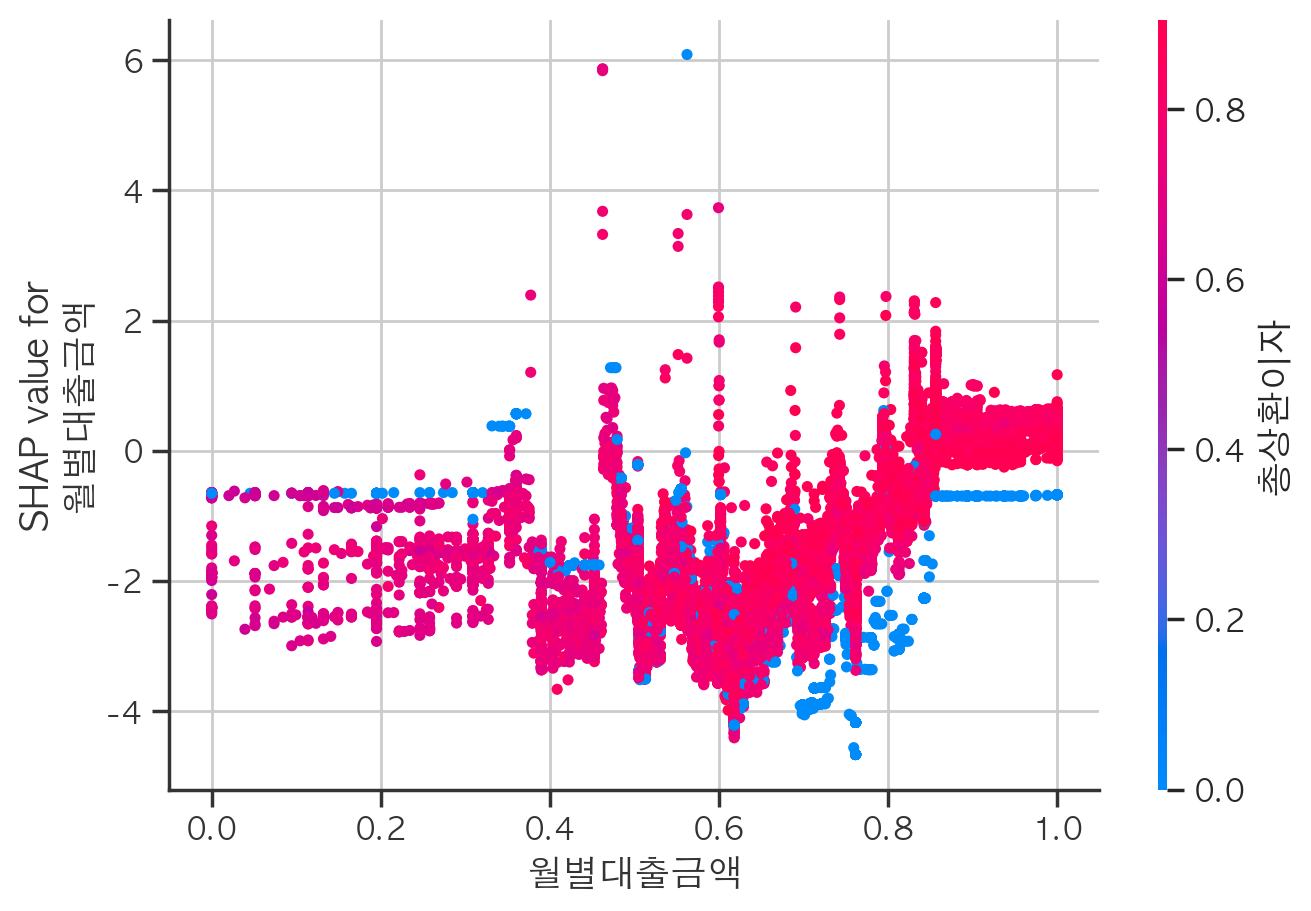

In [150]:
shap.dependence_plot("월별대출금액", shap_values[6], X_test[features], interaction_index="총상환이자")

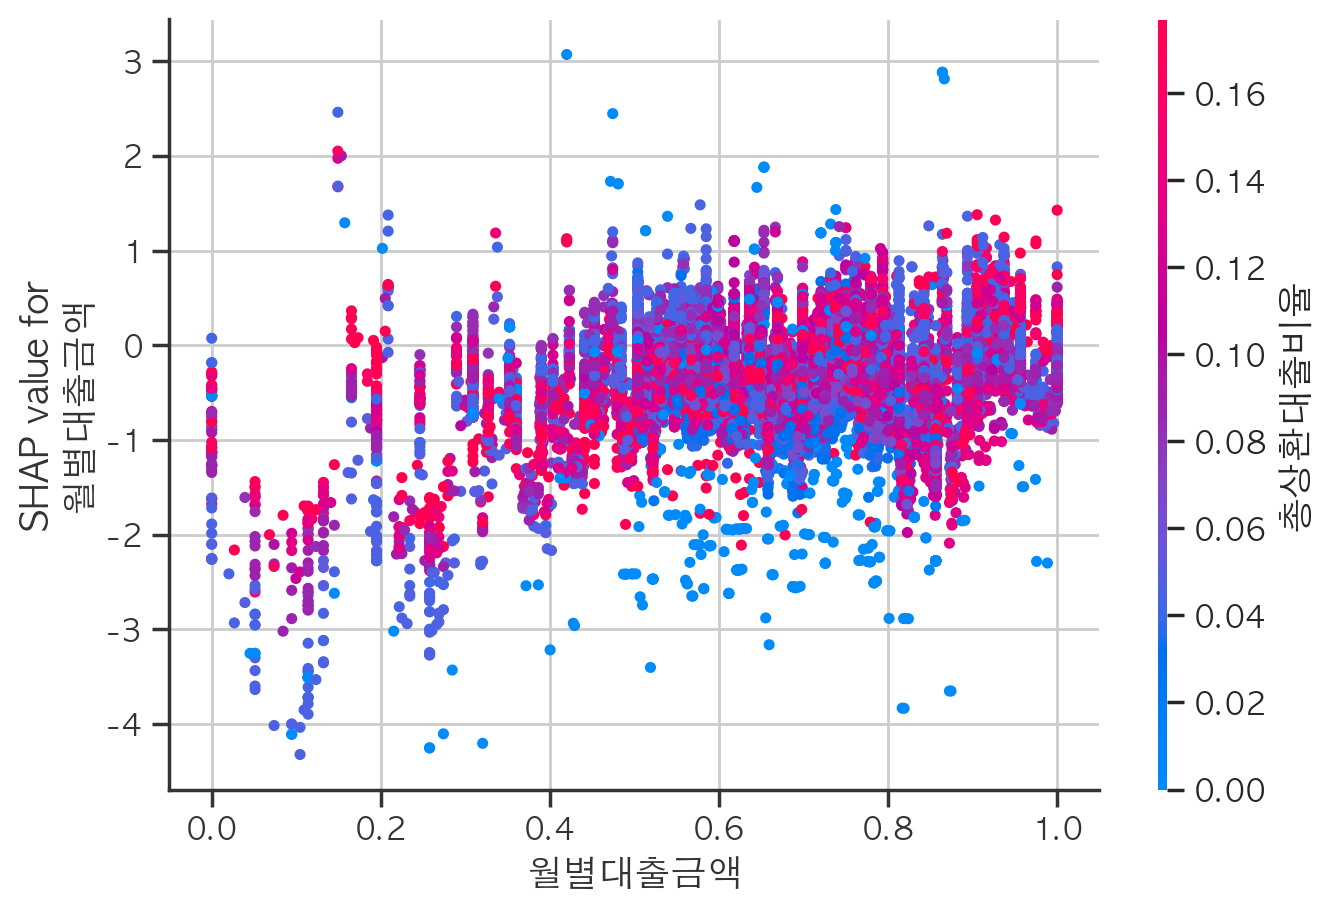

In [151]:
shap.dependence_plot("월별대출금액", shap_values[0], X_test[features], interaction_index="총상환대출비율")

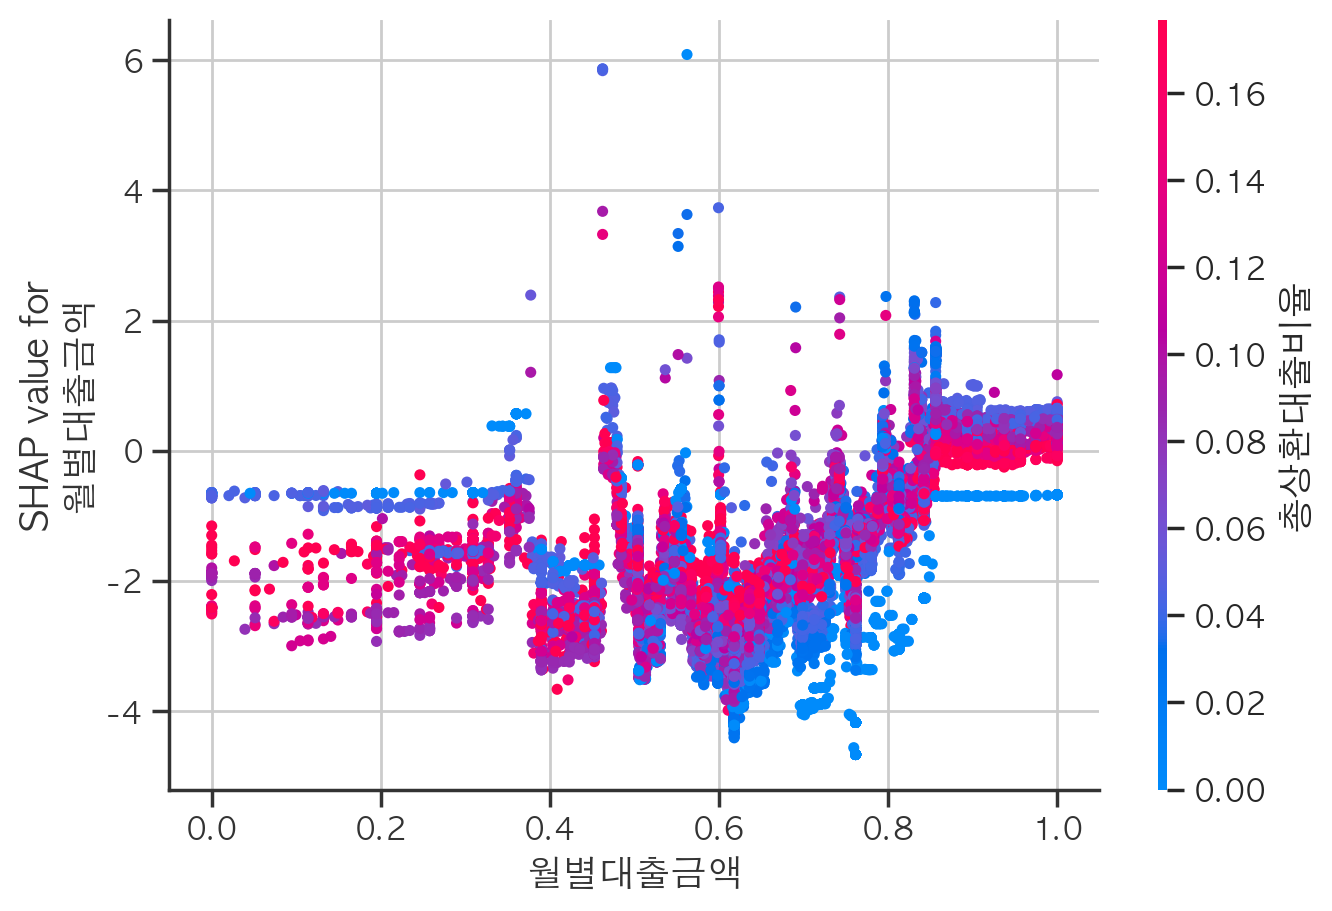

In [152]:
shap.dependence_plot("월별대출금액", shap_values[6], X_test[features], interaction_index="총상환대출비율")

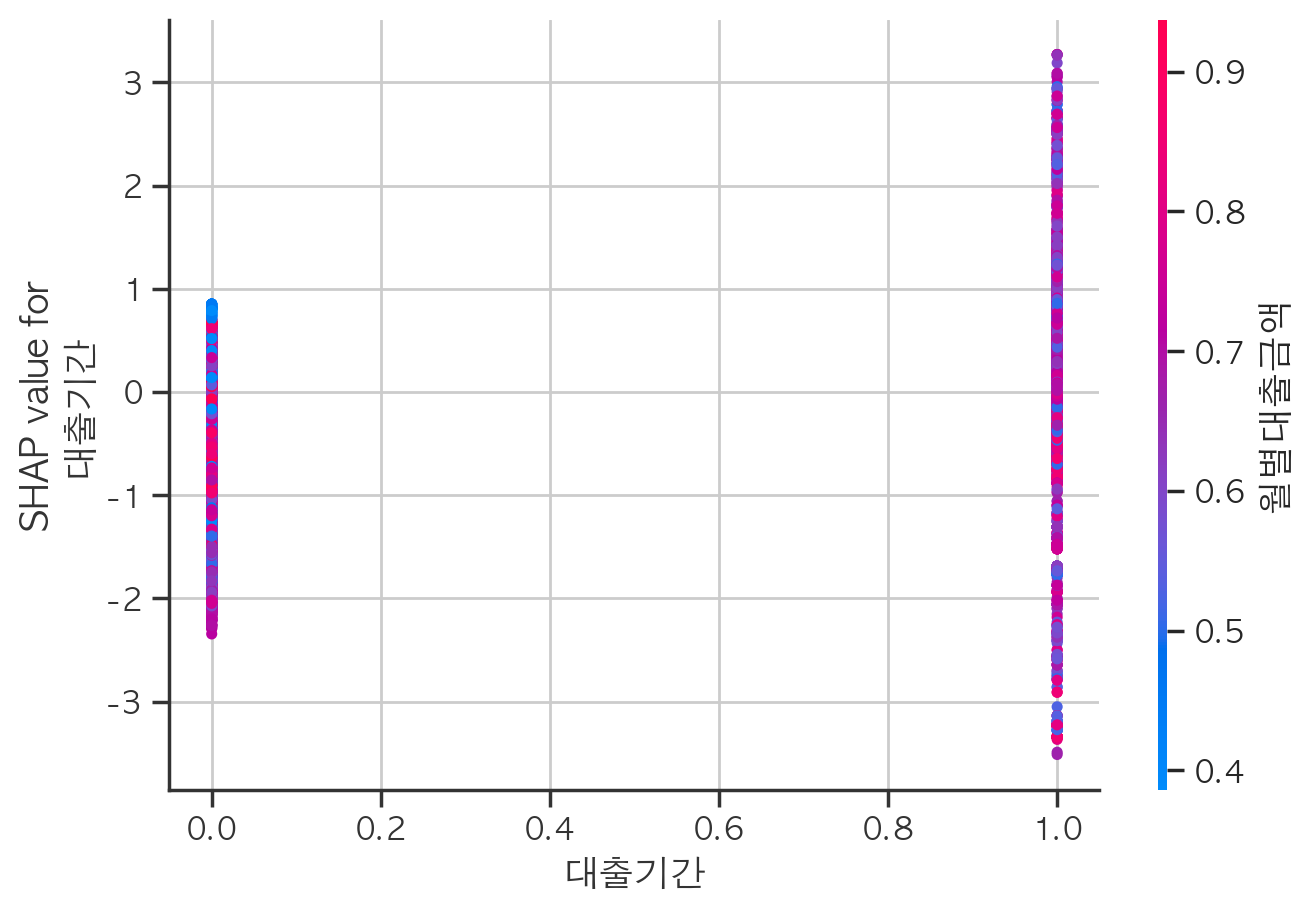

In [154]:
shap.dependence_plot("대출기간", shap_values[0], X_test[features], interaction_index="월별대출금액")

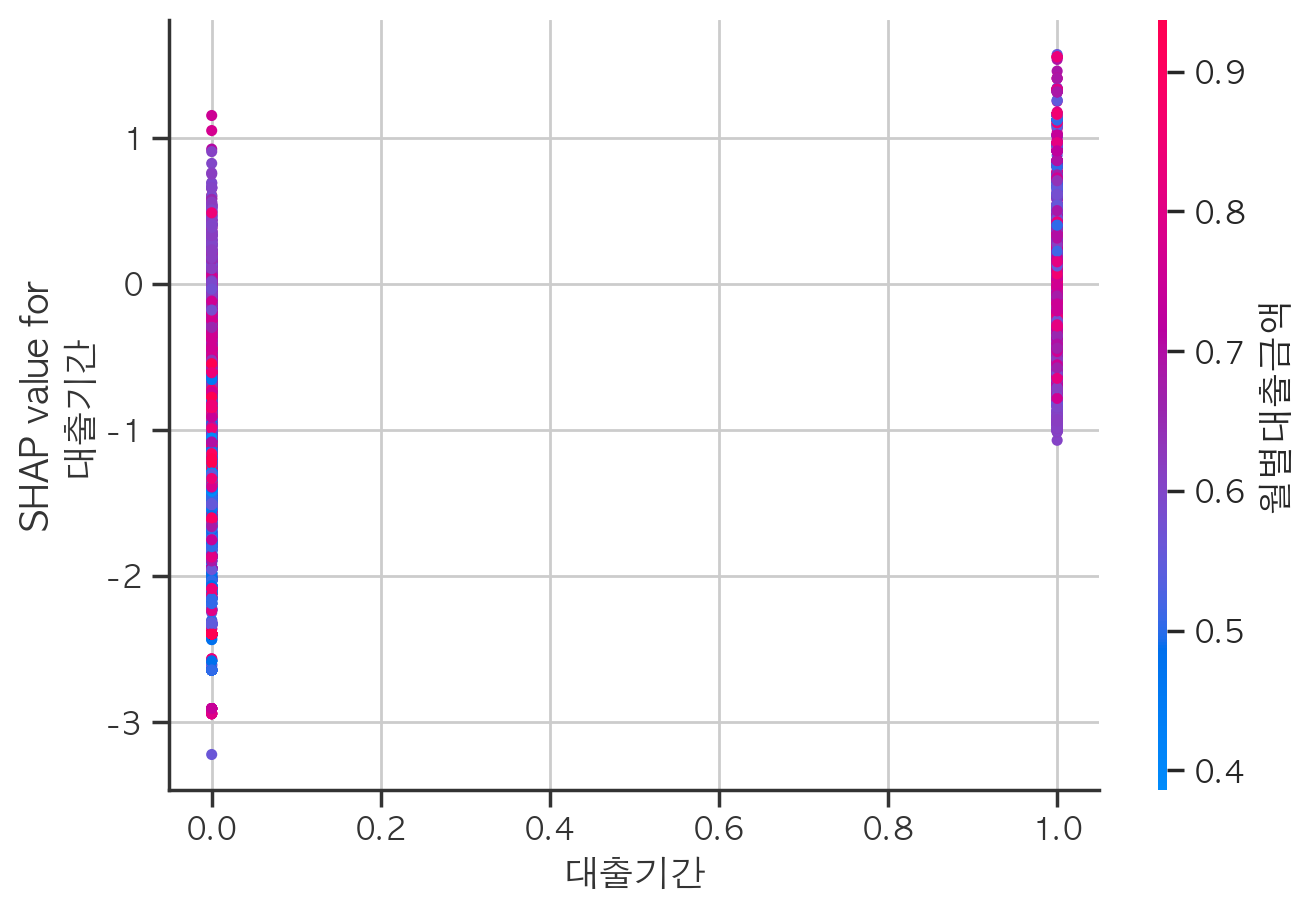

In [155]:
shap.dependence_plot("대출기간", shap_values[6], X_test[features], interaction_index="월별대출금액")

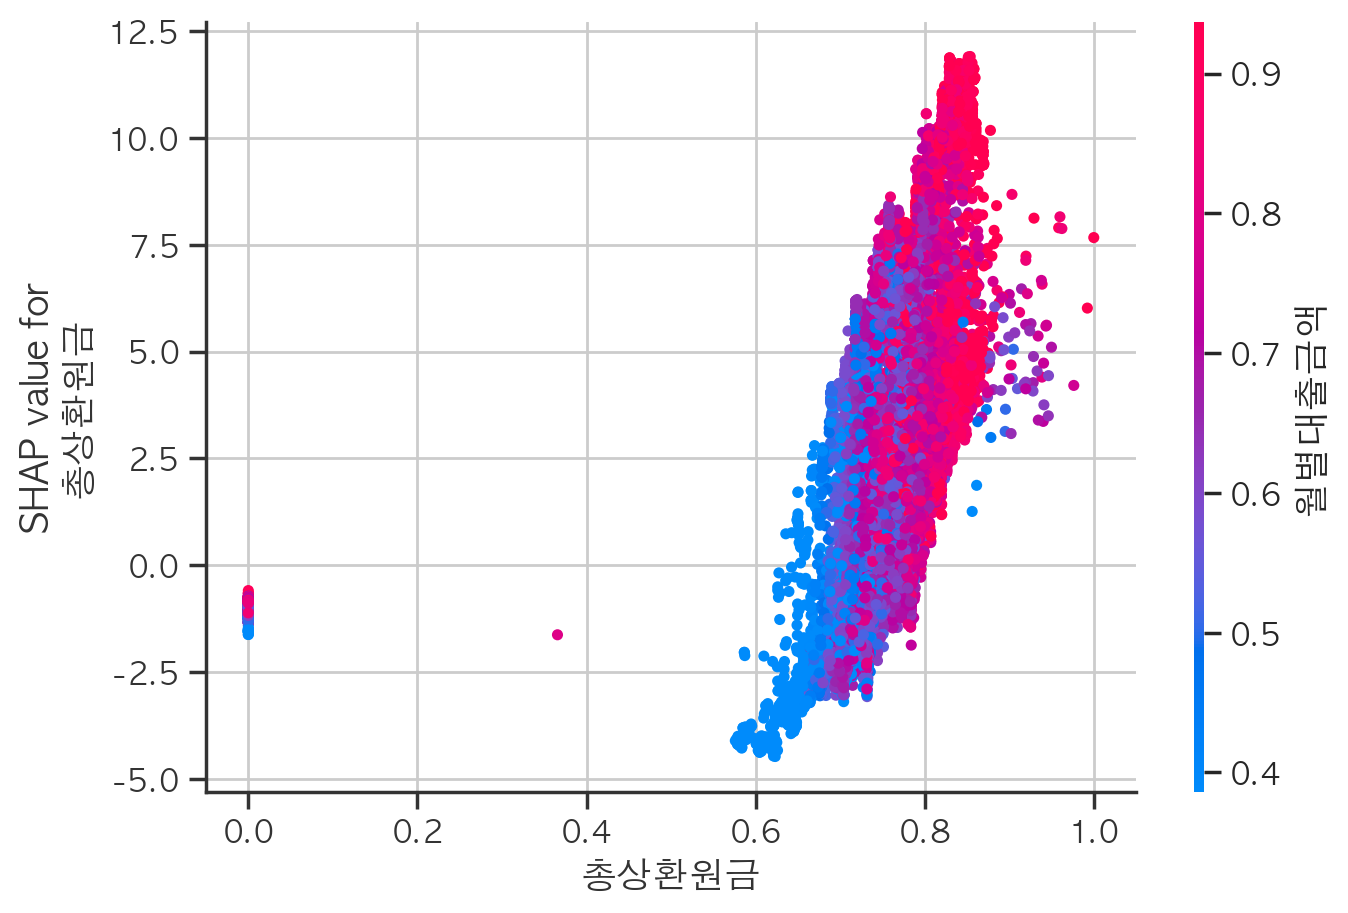

In [156]:
shap.dependence_plot("총상환원금", shap_values[0], X_test[features], interaction_index="월별대출금액")

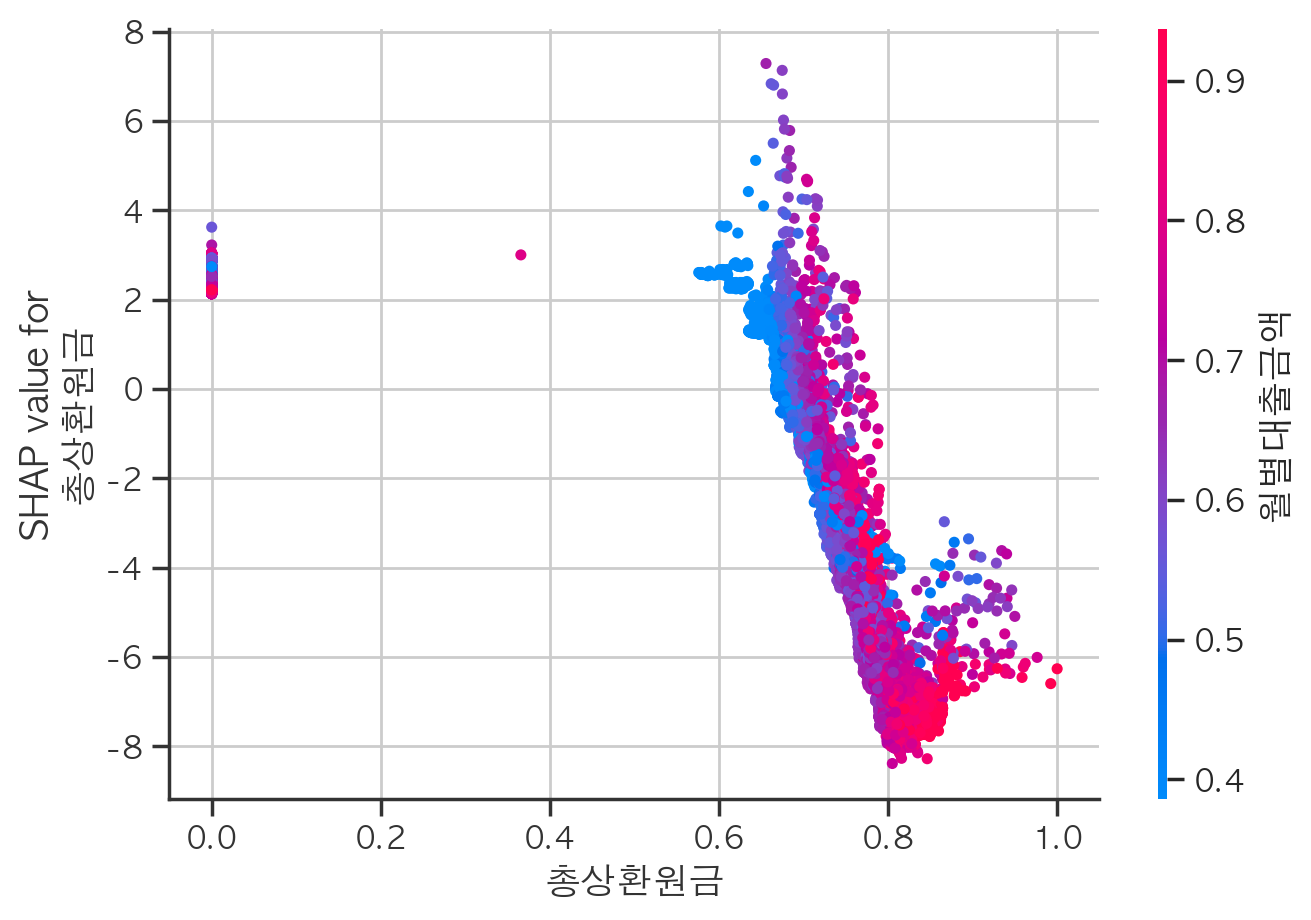

In [157]:
shap.dependence_plot("총상환원금", shap_values[6], X_test[features], interaction_index="월별대출금액")

In [ ]:
y_pred_test = xgb_model.predict(X_test[features])

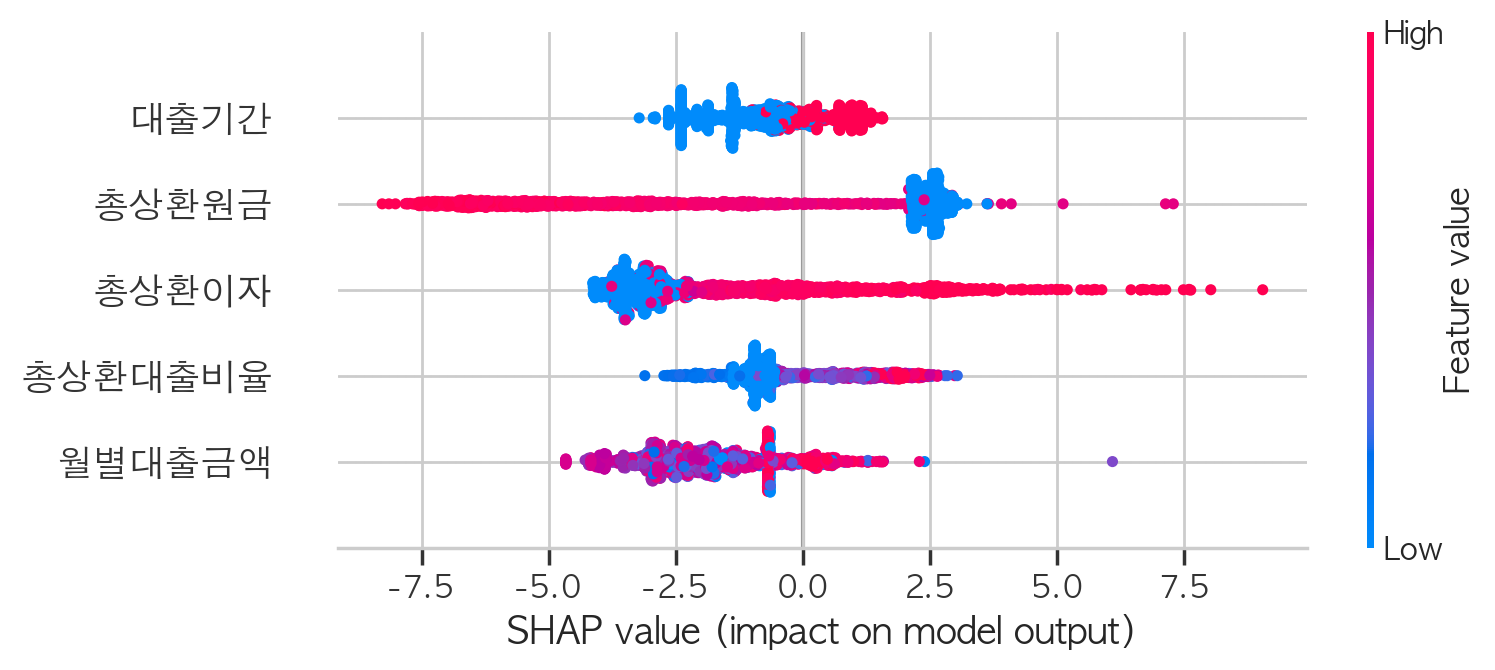

In [158]:
# 모델 예측이 실제 클래스와 다른 경우의 인덱스 추출
incorrect_predictions = np.where(y_pred_test != y_test)[0]

# 잘못 예측된 샘플들의 SHAP values 추출
shap_values_incorrect = shap_values[6][incorrect_predictions, :]

# SHAP summary plot 그리기
shap.summary_plot(shap_values_incorrect, X_test.iloc[incorrect_predictions, :][features], 
                  feature_names=X_test[features].columns, sort=False)
plt.show()
